In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
stock=pd.read_csv("C:\\Users\\Siva\\Desktop\\ExcelR\\Project\\AAPL.csv",index_col='Date')
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0+ KB


In [5]:
stock.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [7]:
print(stock[stock.duplicated()])


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


#from the above observations, we can assist that the data doesn't have any null values, duplicates values.


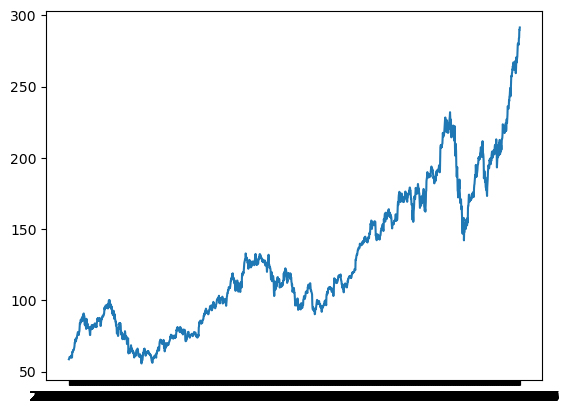

In [8]:
plt.plot(stock['Close'])
plt.show()

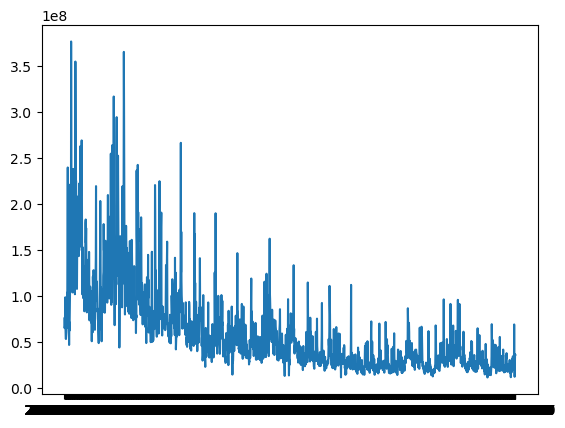

In [9]:
plt.plot(stock['Volume'])

<AxesSubplot:xlabel='Close', ylabel='Density'>

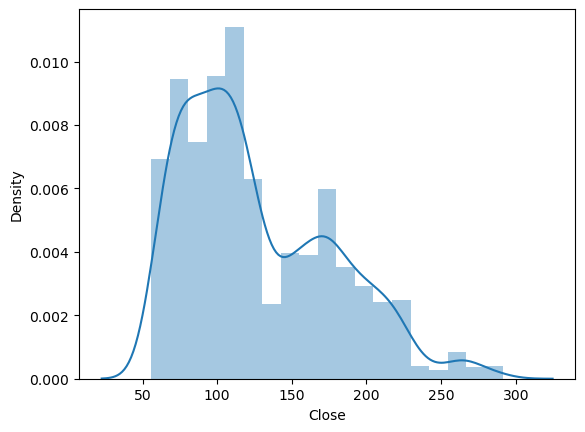

In [10]:
sns.distplot(stock['Close'])

In [11]:
stock.index=pd.to_datetime(stock.index)  

###converting index to Data-time data type

In [12]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [13]:
stock["Date"] = pd.to_datetime(stock.index,format="%Y-%m-%d")
stock["month"] = stock.Date.dt.strftime("%m") # month extraction
stock["year"] = stock.Date.dt.strftime("%Y") # year extraction
stock["Day"] = stock.Date.dt.strftime("%d") # Day extraction

In [14]:
stock['week']=stock.Date.dt.strftime("%V")
stock['quarter']=stock.Date.dt.quarter
stock['quater_y']=stock.Date.dt.to_period('Q')

In [15]:
stock.rename(columns={'quater_y':'quarter_y'}, inplace=True)

In [16]:
stock.groupby(['year'])['year'].value_counts()

year  year
2012  2012    250
2013  2013    252
2014  2014    252
2015  2015    252
2016  2016    252
2017  2017    251
2018  2018    251
2019  2019    251
Name: year, dtype: int64

In [17]:
stock.groupby(['year'])['year'].value_counts().sum()

2011

###as per US calendar, working days count in a year is matching... so we can conclude that data given is continuous 

In [18]:
stock.groupby(['year'])['month'].value_counts()

year  month
2012  08       23
      03       22
      05       22
      06       21
      07       21
               ..
2019  06       20
      09       20
      11       20
      12       20
      02       19
Name: month, Length: 96, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Close'>

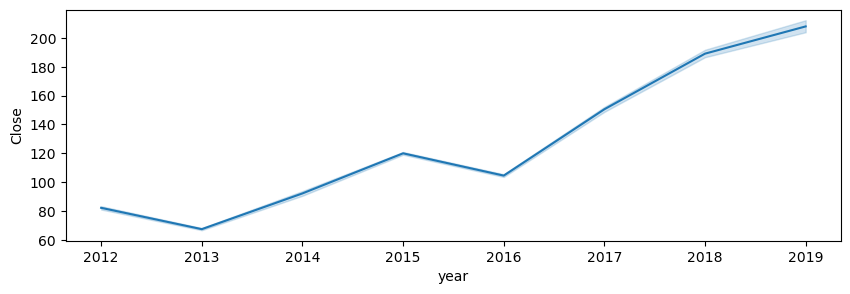

In [19]:

plt.figure(figsize=(10,3))
sns.lineplot(x="year",y="Close",data=stock)


###as per my understanding there is downfall in stock price between 2012 and 2013. then stock price is increased between 2013 and2015.
###between 2015 to 2016 stock price reduced and then it gradually increased

<AxesSubplot:xlabel='month', ylabel='Close'>

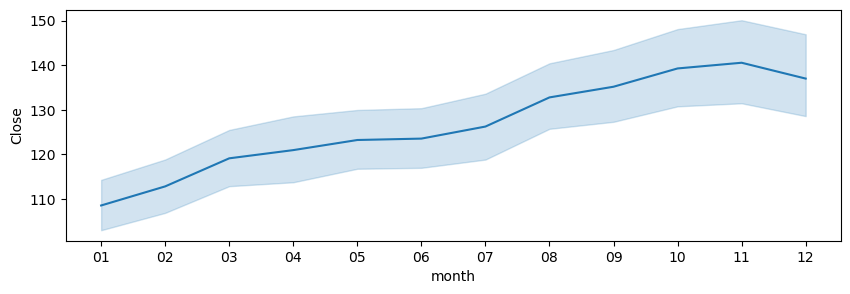

In [20]:

plt.figure(figsize=(10,3))
sns.lineplot(x="month",y="Close",data=stock)

###stock price is increased from jan to nov and slight fall in dec

<AxesSubplot:xlabel='quarter', ylabel='Close'>

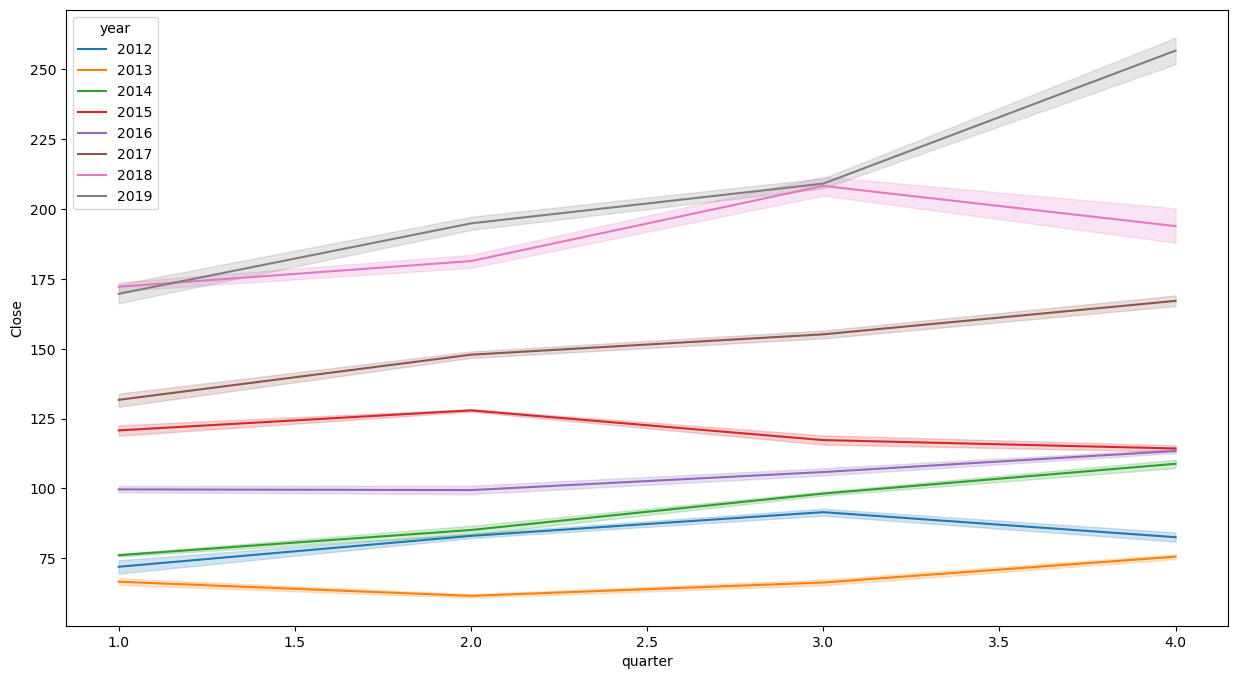

In [21]:

plt.figure(figsize=(15,8))
sns.lineplot(x="quarter",y="Close",data=stock,  hue='year')

<AxesSubplot:xlabel='quarter_y', ylabel='Close'>

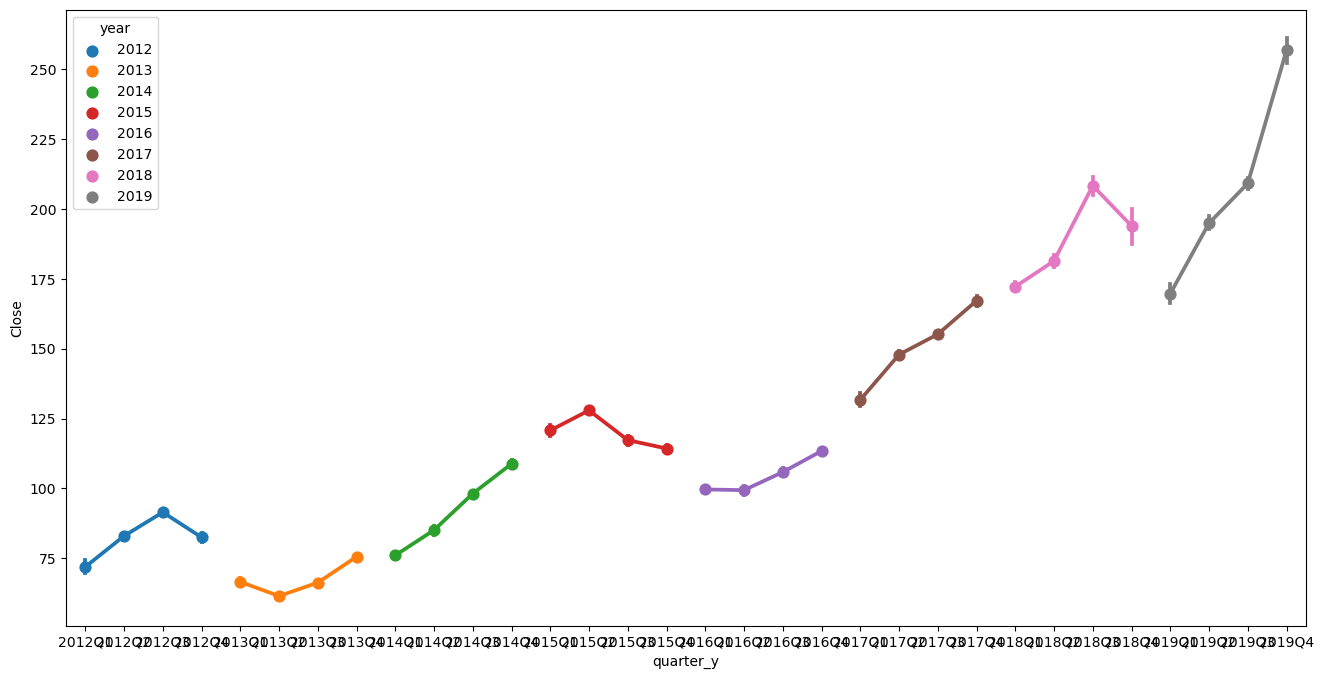

In [22]:
plt.figure(figsize=(16,8))
sns.pointplot(data=stock, x='quarter_y',y='Close',hue='year')

<AxesSubplot:xlabel='year', ylabel='Close'>

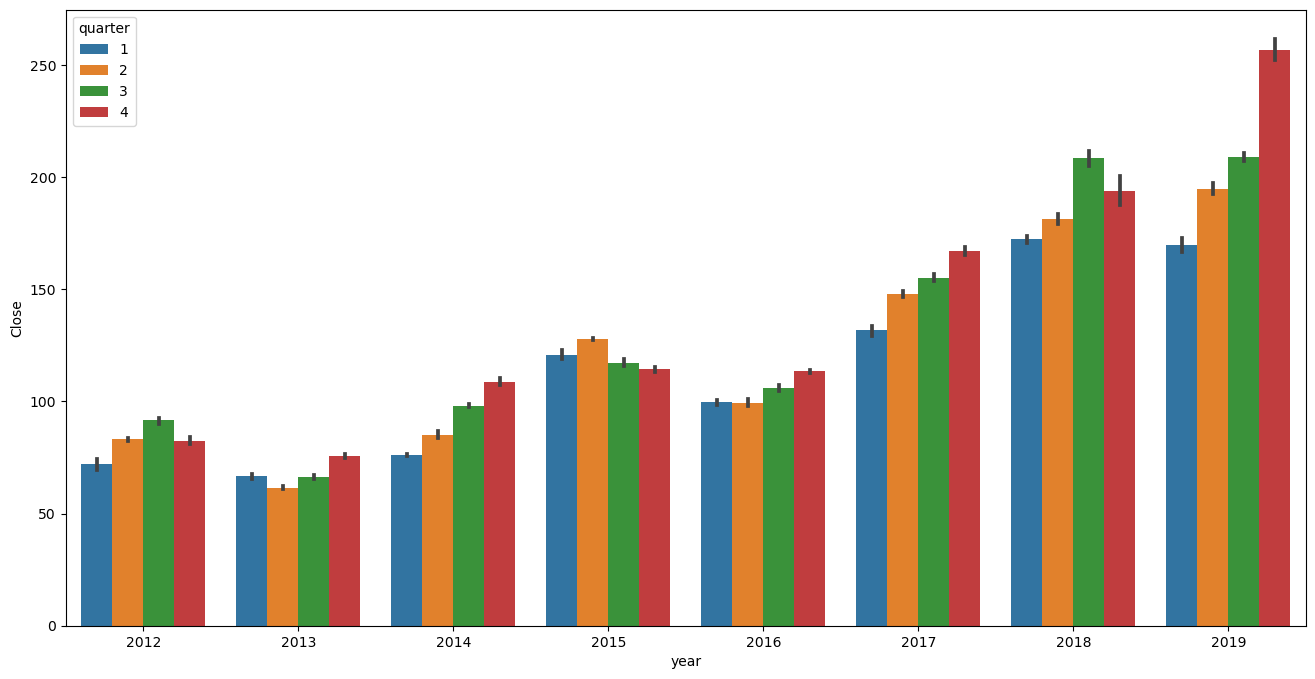

In [23]:
plt.figure(figsize=(16,8))
sns.barplot(data=stock, x='year',y='Close',hue='quarter')

###from above bar plot, we can observe that 2012 and 2018 shows similar pattern
###2013 and 2016 showing similar pattern
###2014,2017.2019 are showing same pattern

which clear indicates data is having seasonality and data is non stationary

<AxesSubplot:xlabel='year', ylabel='month'>

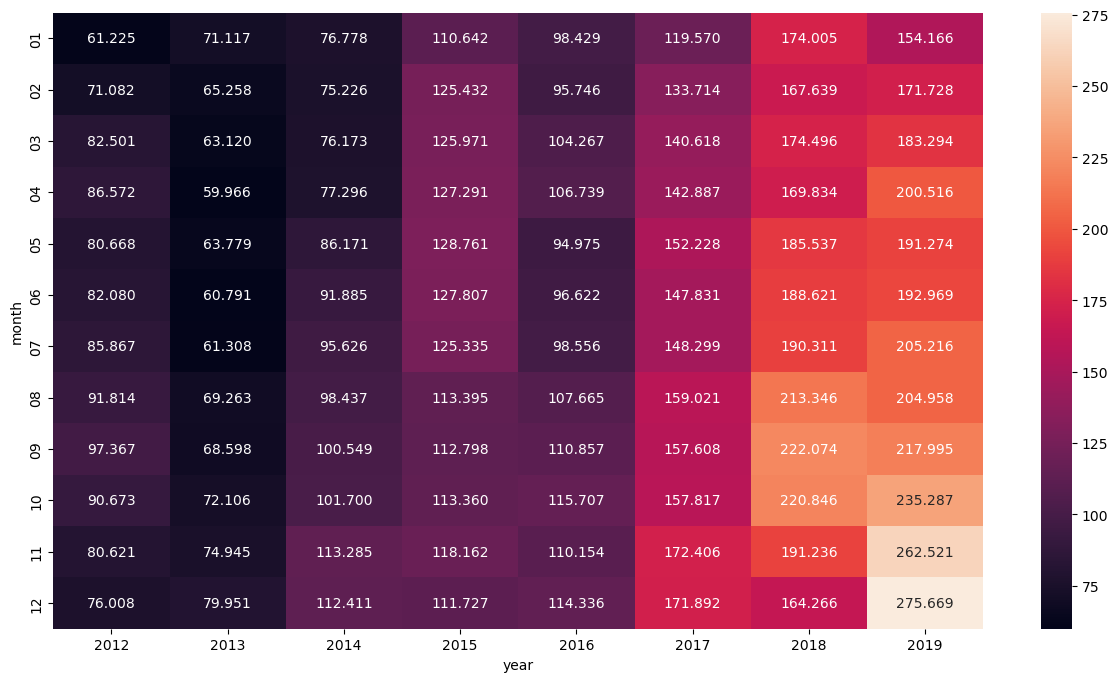

In [24]:
plt.figure(figsize=(15,8))
hm = pd.pivot_table(data=stock,values="Close",index="month",columns="year")
sns.heatmap(hm,annot=True,fmt=".3f") #fmt is format of the grid values


###as per heat map there is high correlation between 2019 dec data

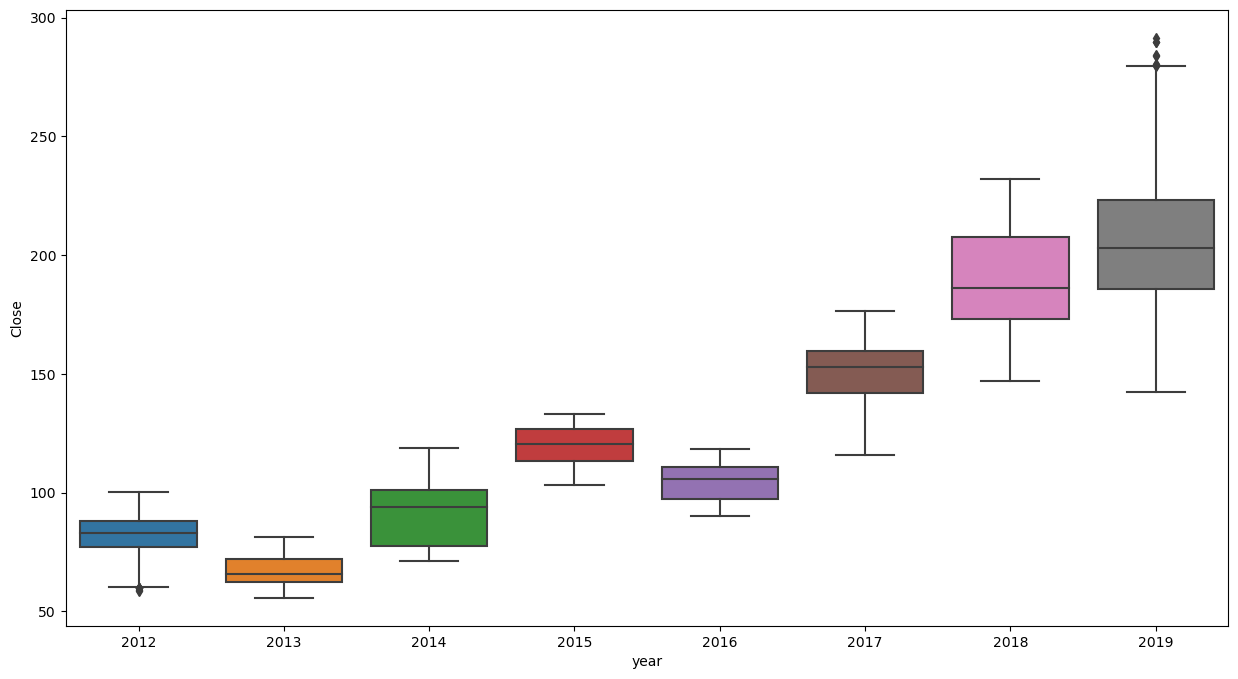

In [25]:
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data=stock, x=stock.year, y = 'Close',  ax = ax);


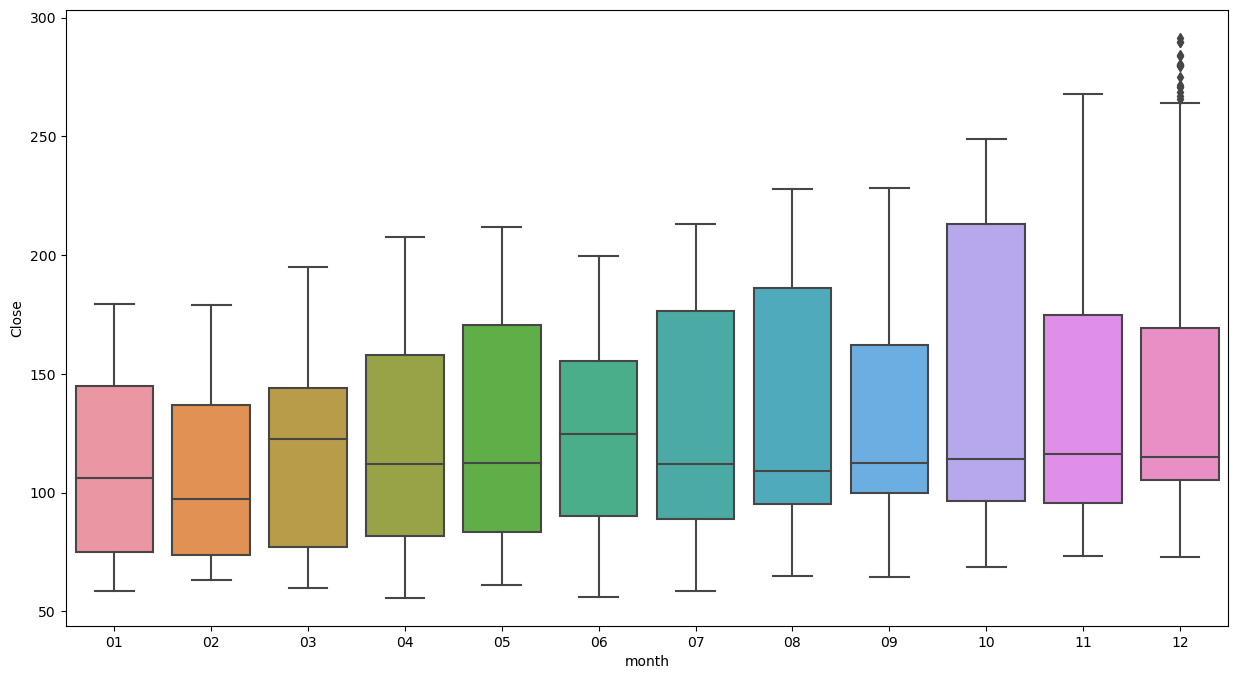

In [26]:
fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(data=stock, x=stock.month, y = 'Close',  ax = ax);


<AxesSubplot:xlabel='year', ylabel='Volume'>

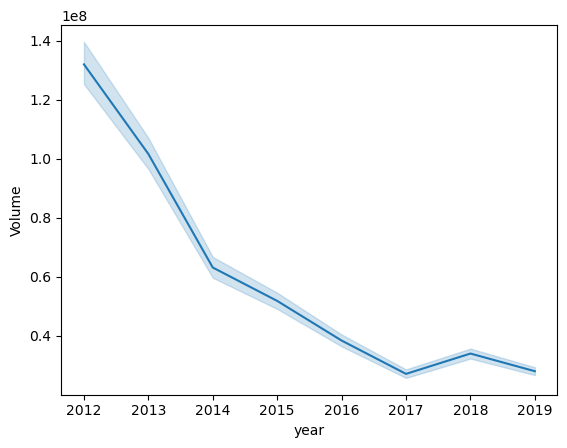

In [27]:
sns.lineplot(data=stock,x='year' ,y='Volume')

###Stock price increasing every year and volume of stocks are reducing

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

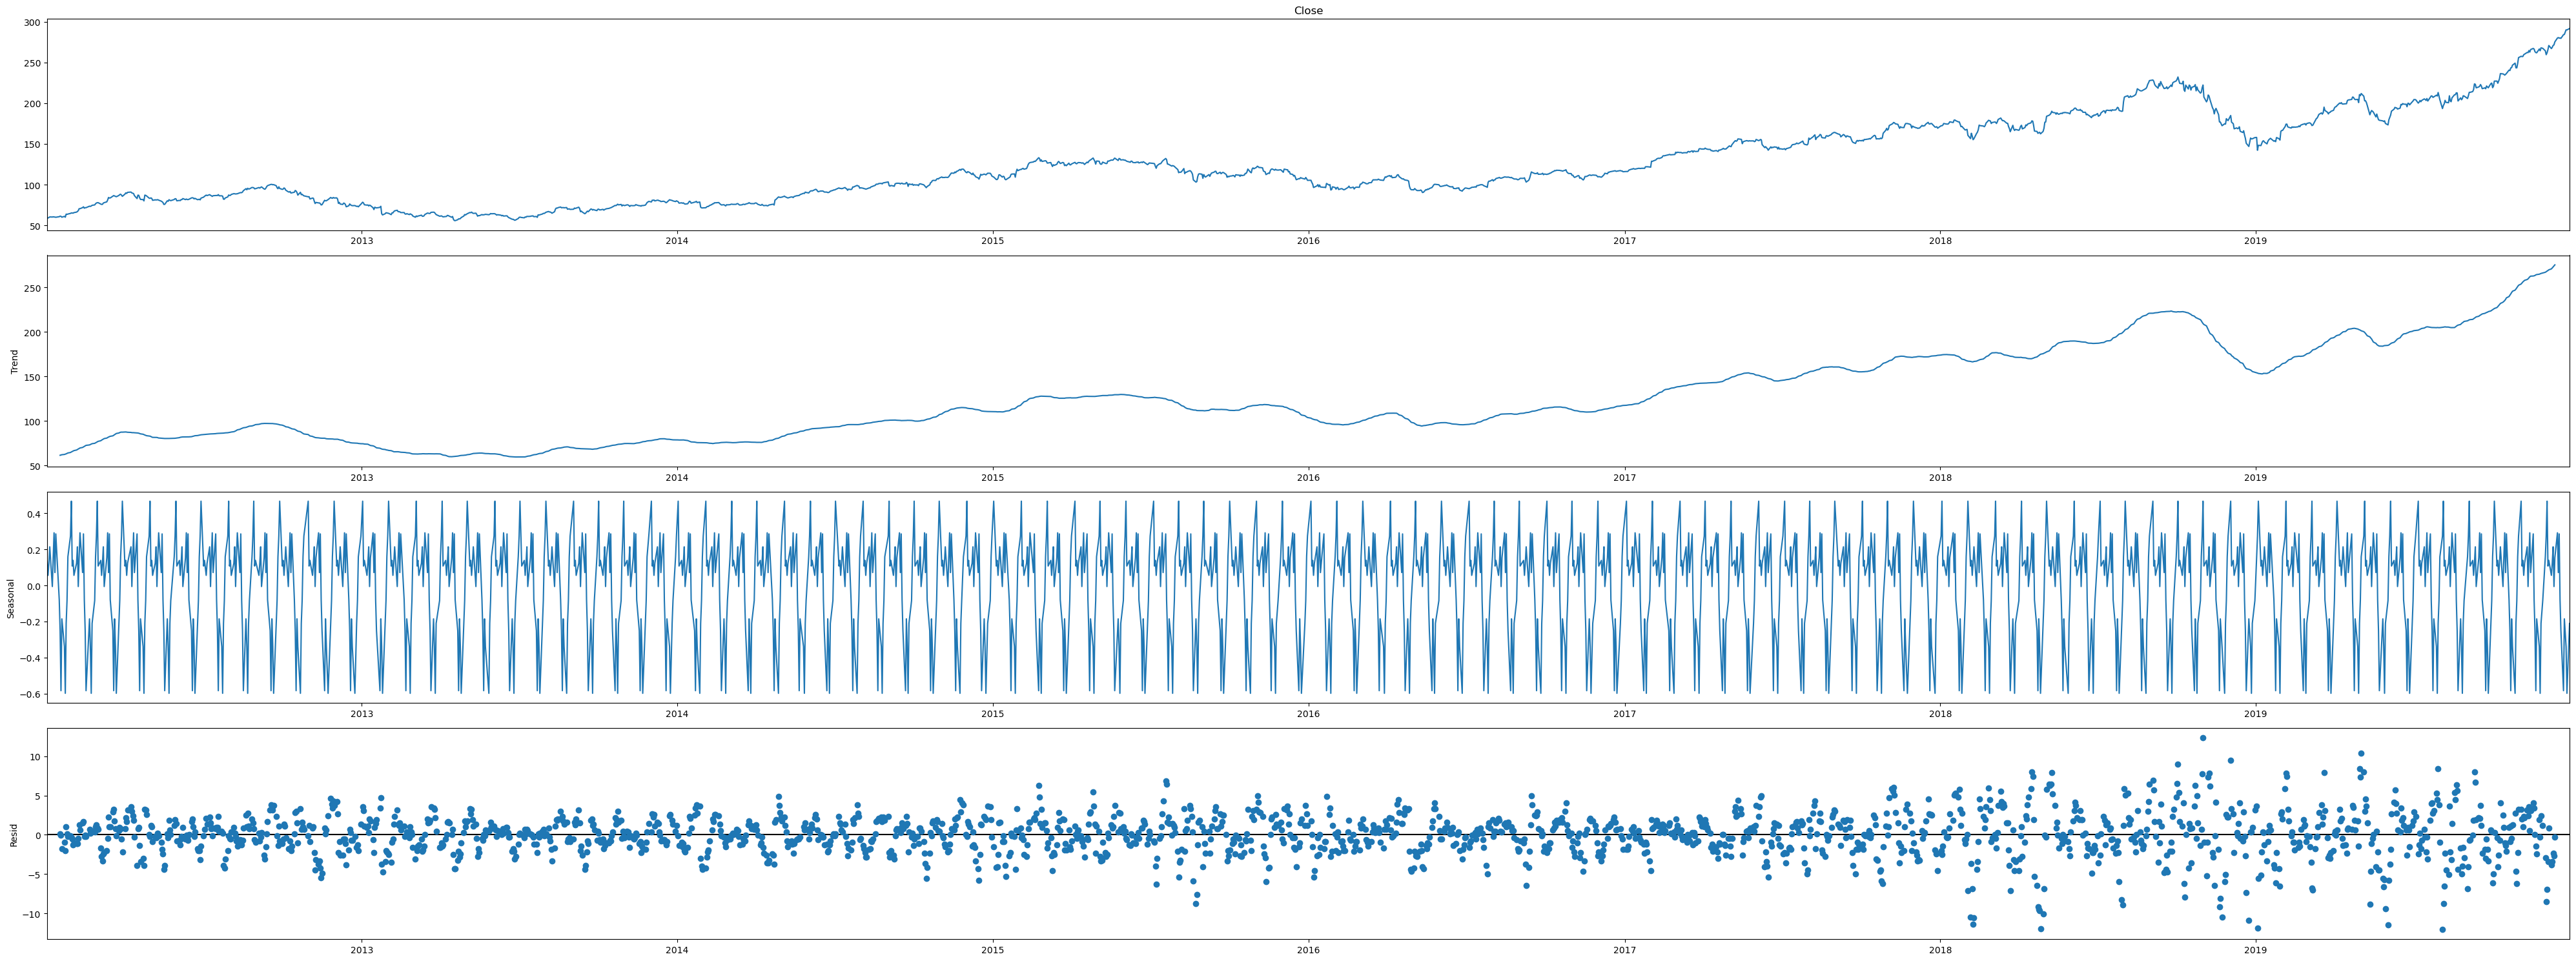

In [30]:
decompose= seasonal_decompose(stock.Close,period=21)
decompose.plot()
plt.rcParams['figure.figsize'] = (30, 15);

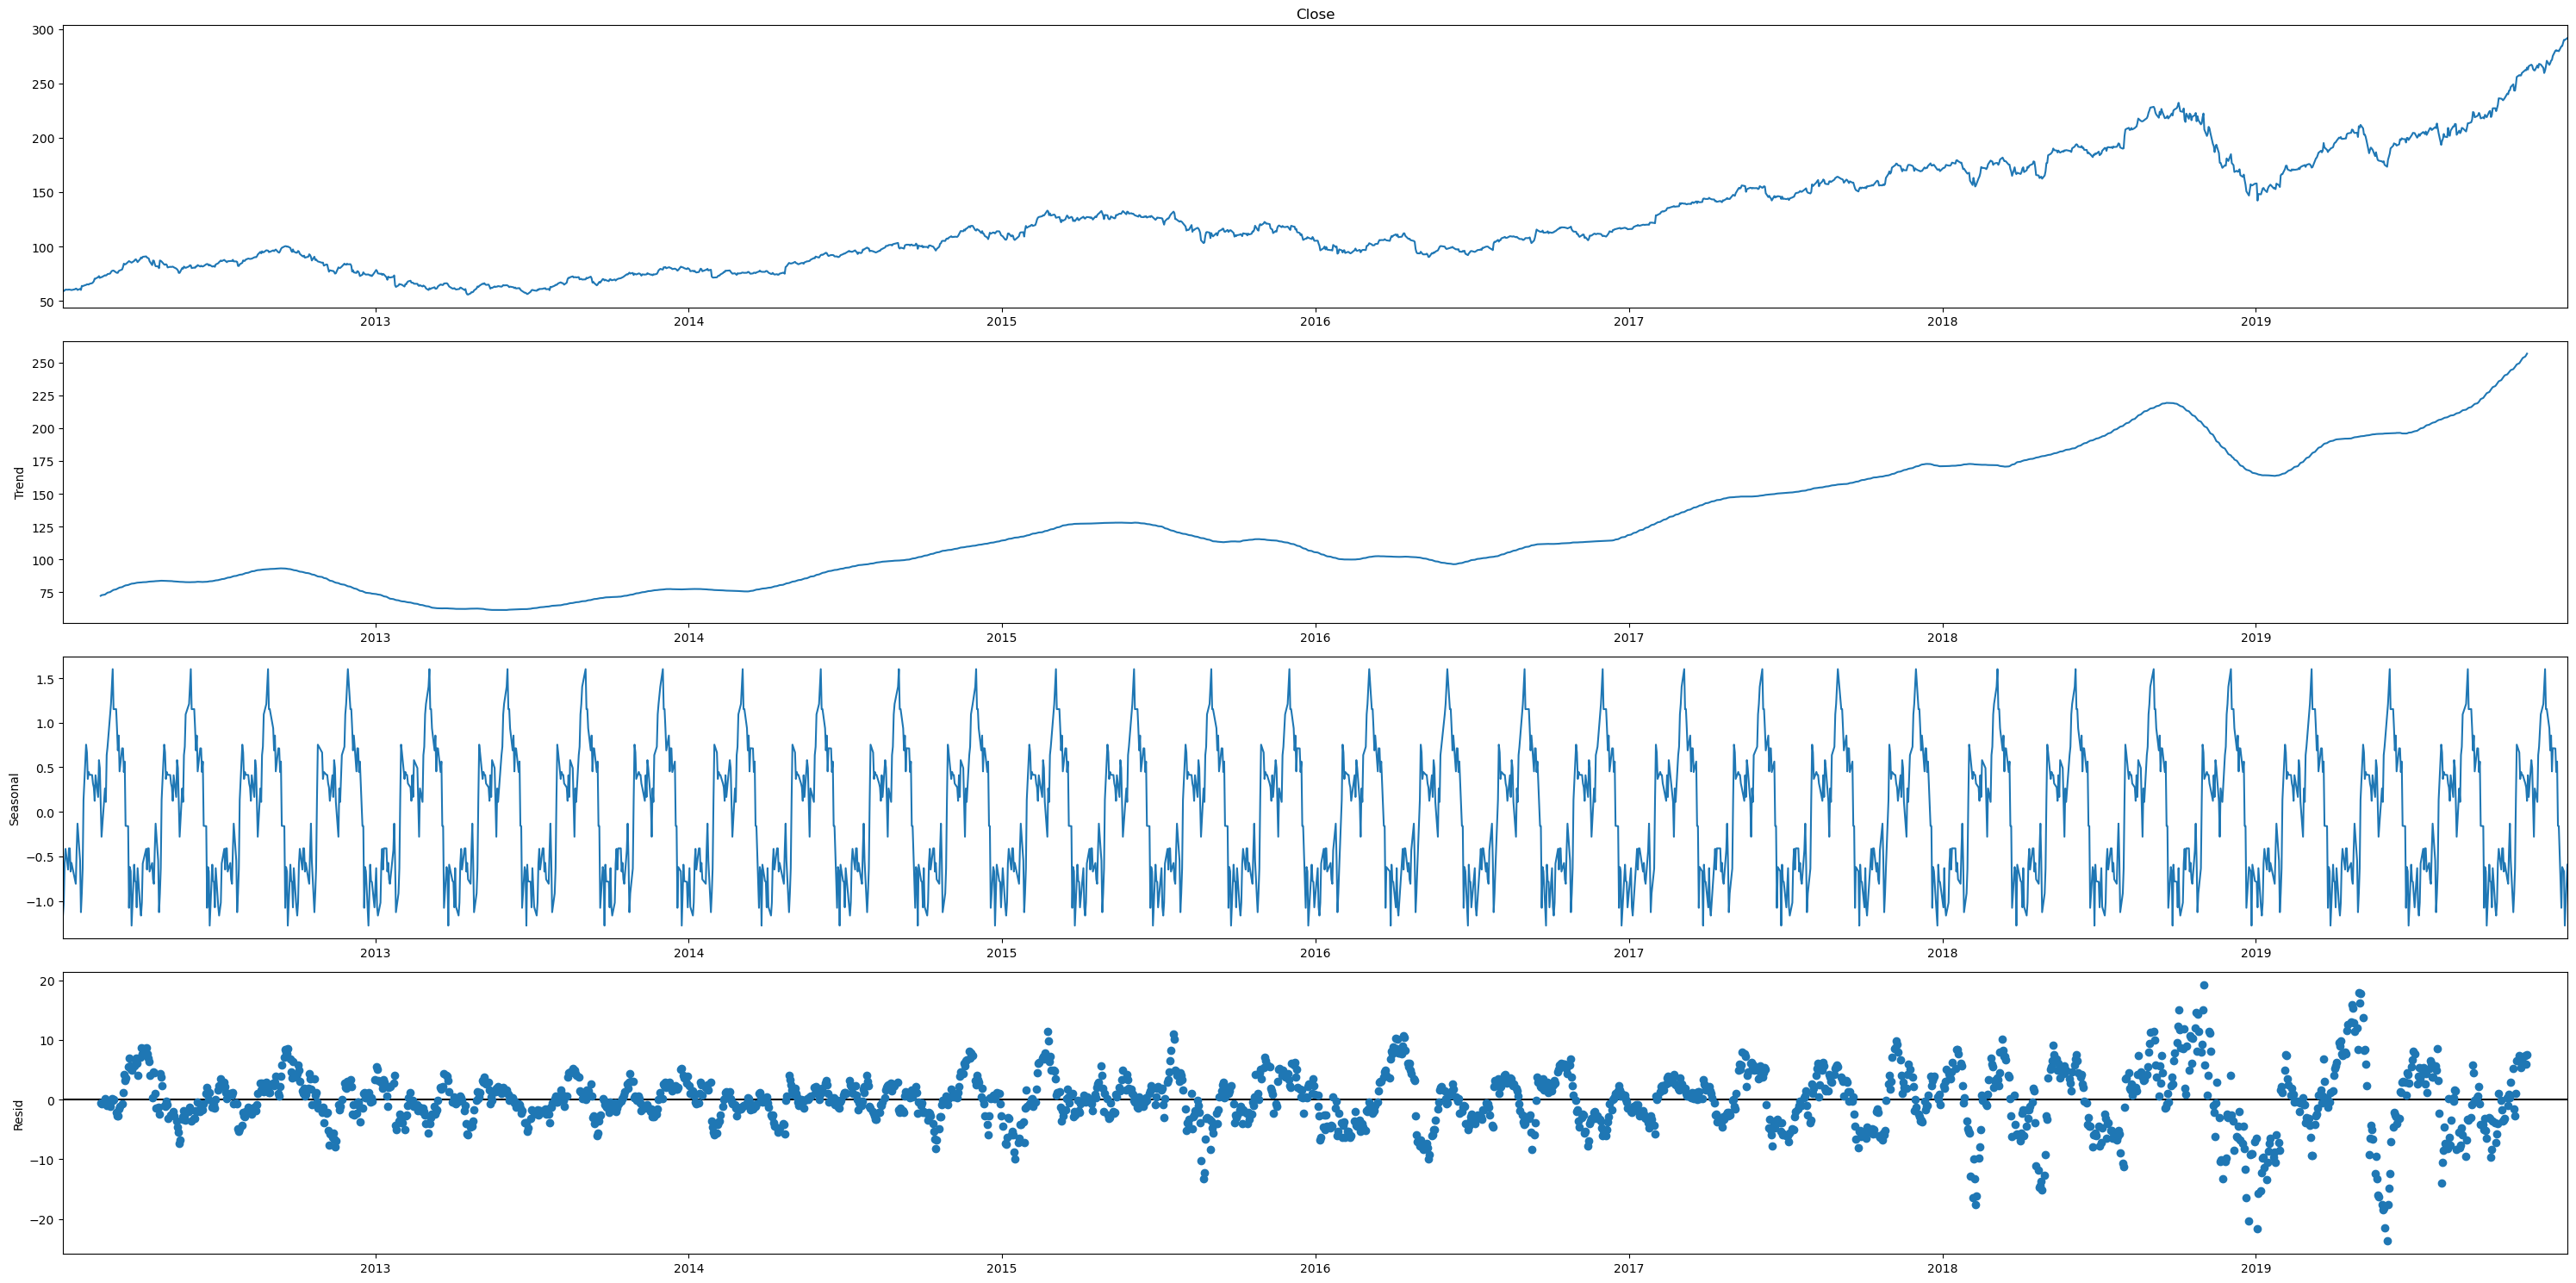

In [31]:
decompose= seasonal_decompose(stock.Close,period=63)
decompose.plot()
plt.rcParams['figure.figsize'] = (30, 15);

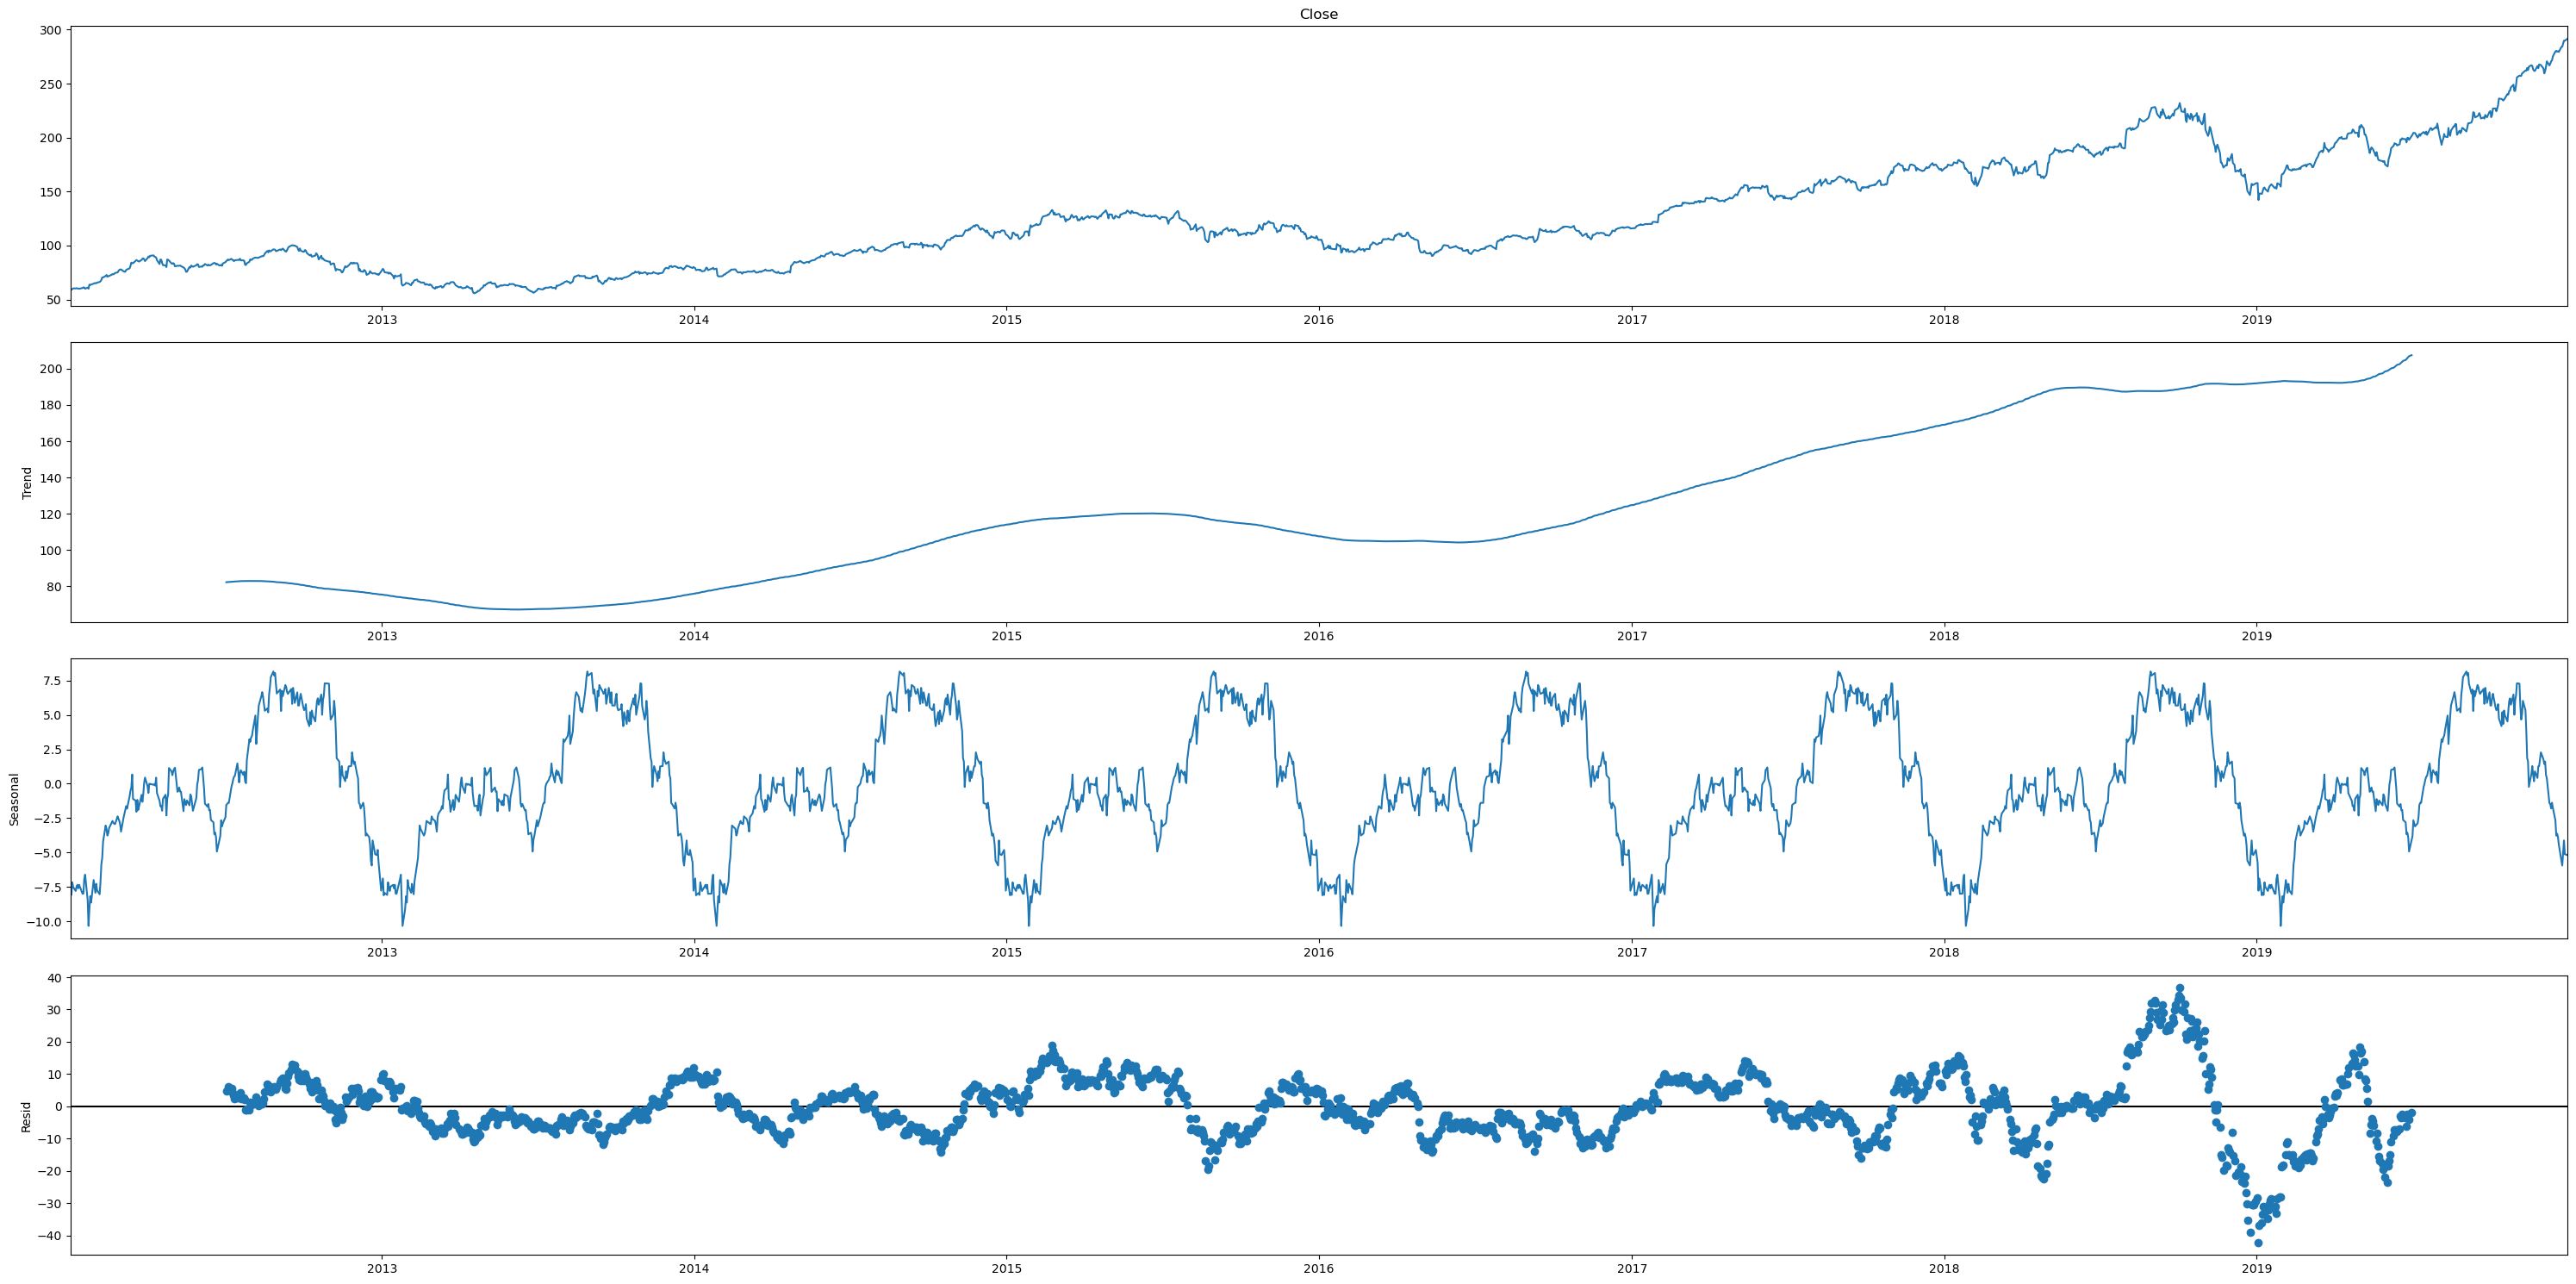

In [32]:
decompose= seasonal_decompose(stock.Close,period=252)
decompose.plot()
plt.rcParams['figure.figsize'] = (30, 15);

###Data is having seasonality and exponential growth in Trend, so we can say that data is non stationary
###residuals doesn't have much deviation and there is no outliers

Mean is: 126.74123461064164


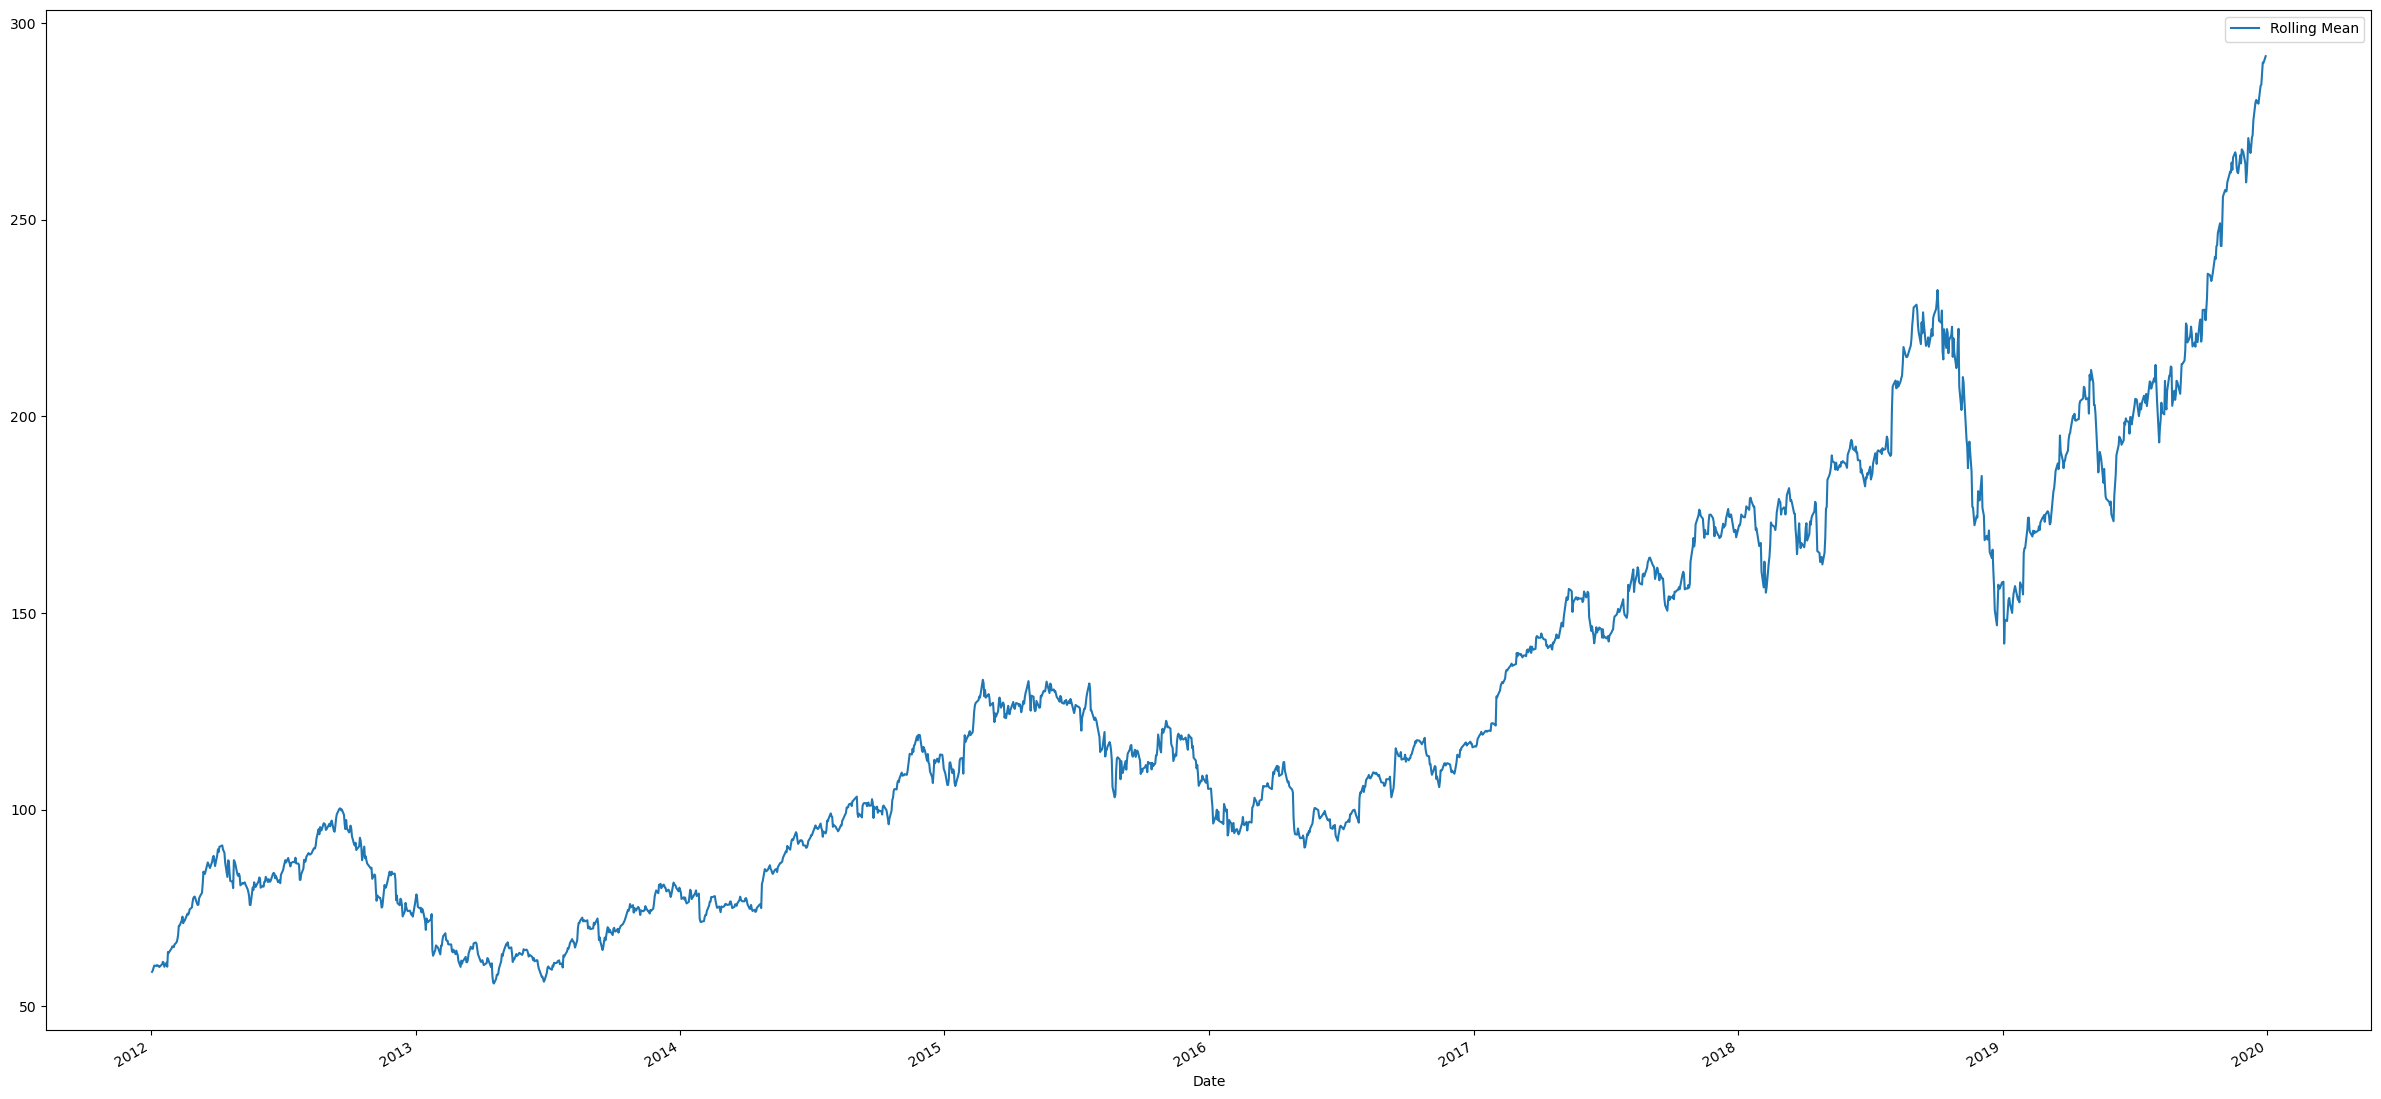

In [35]:
stock["Close"].rolling(1, center=False).mean().plot(legend=True, label="Rolling Mean");
print("Mean is:", stock["Close"].mean())

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

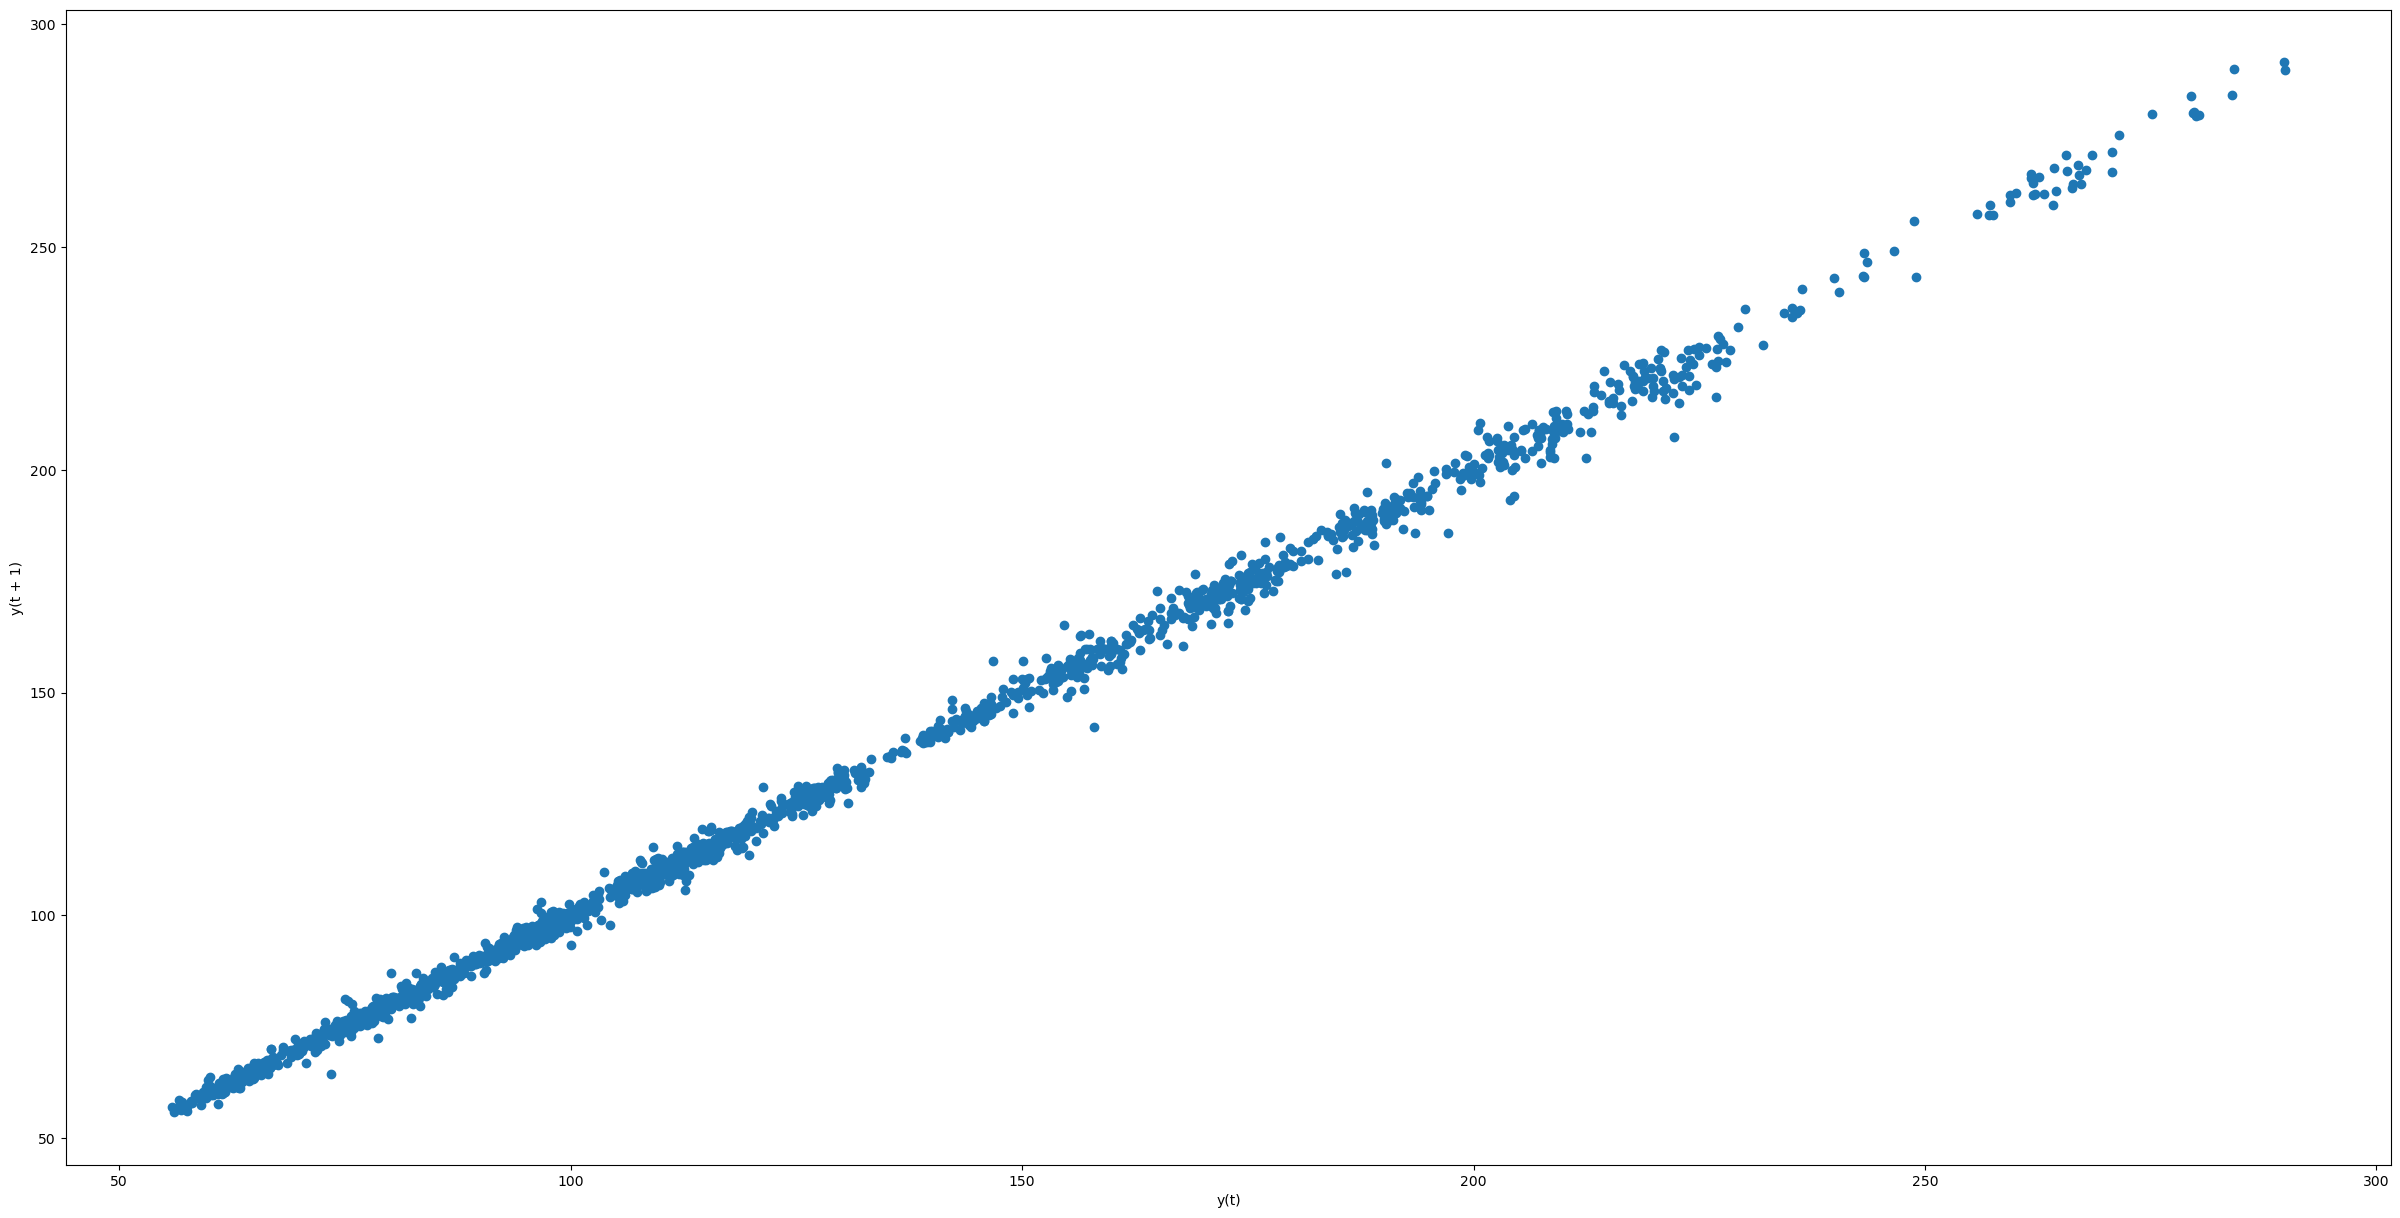

In [36]:
pd.plotting.lag_plot(stock['Close'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 20)'>

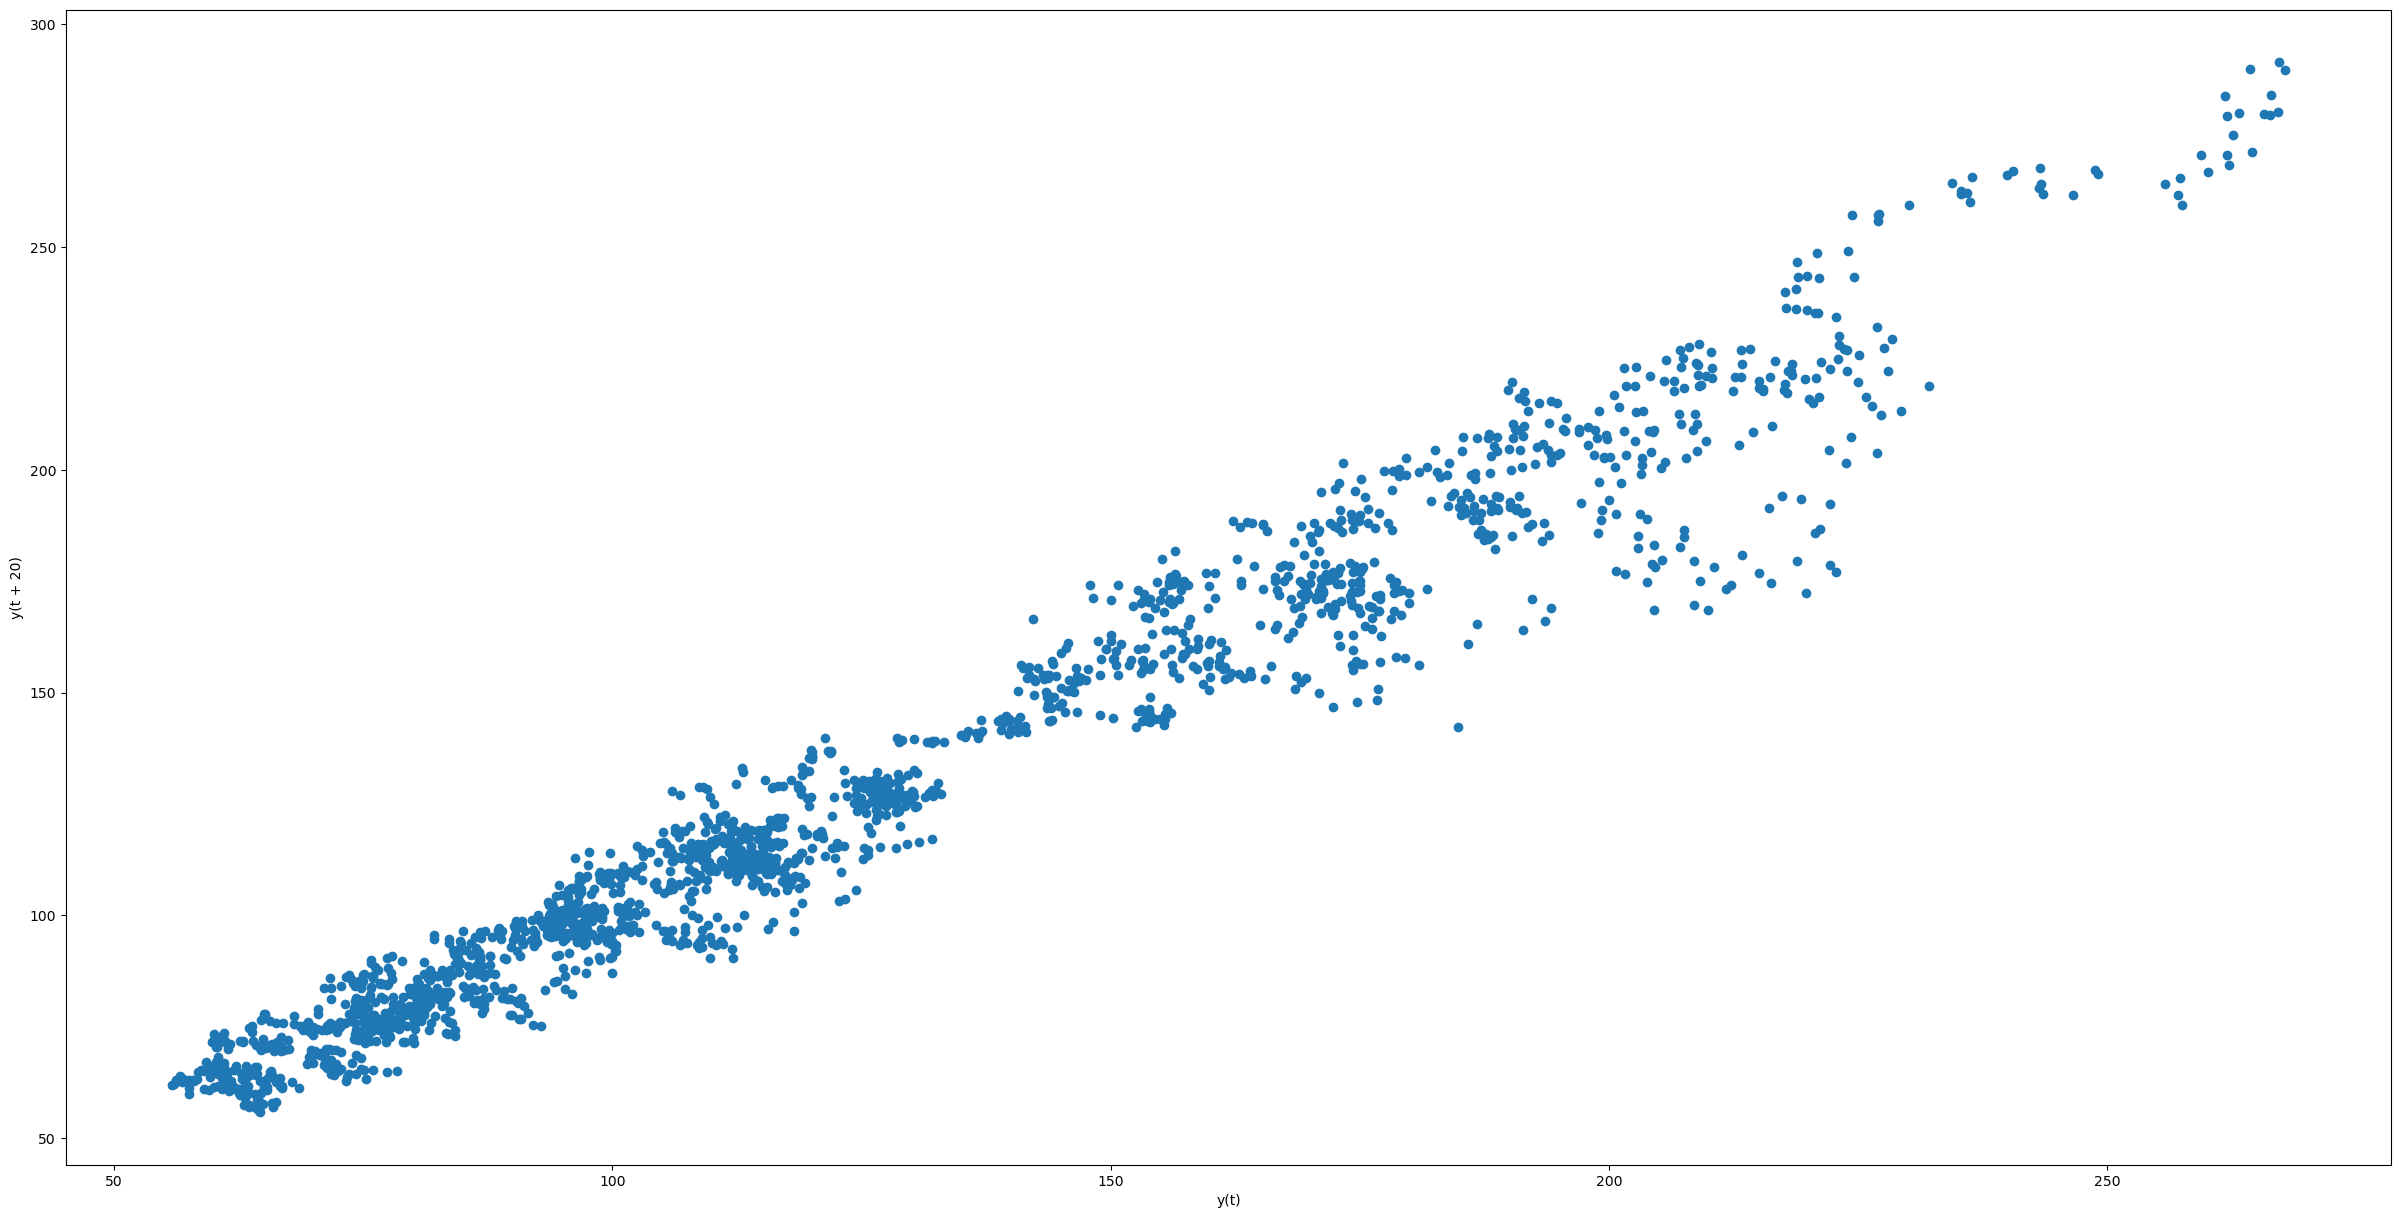

In [37]:
pd.plotting.lag_plot(stock['Close'],lag=20)

In [38]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(stock["Close"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9961 , Series is Non-Stationary


###after seeing lag plots, rolling mean and adfuller test 
###we can say that data is not stationary

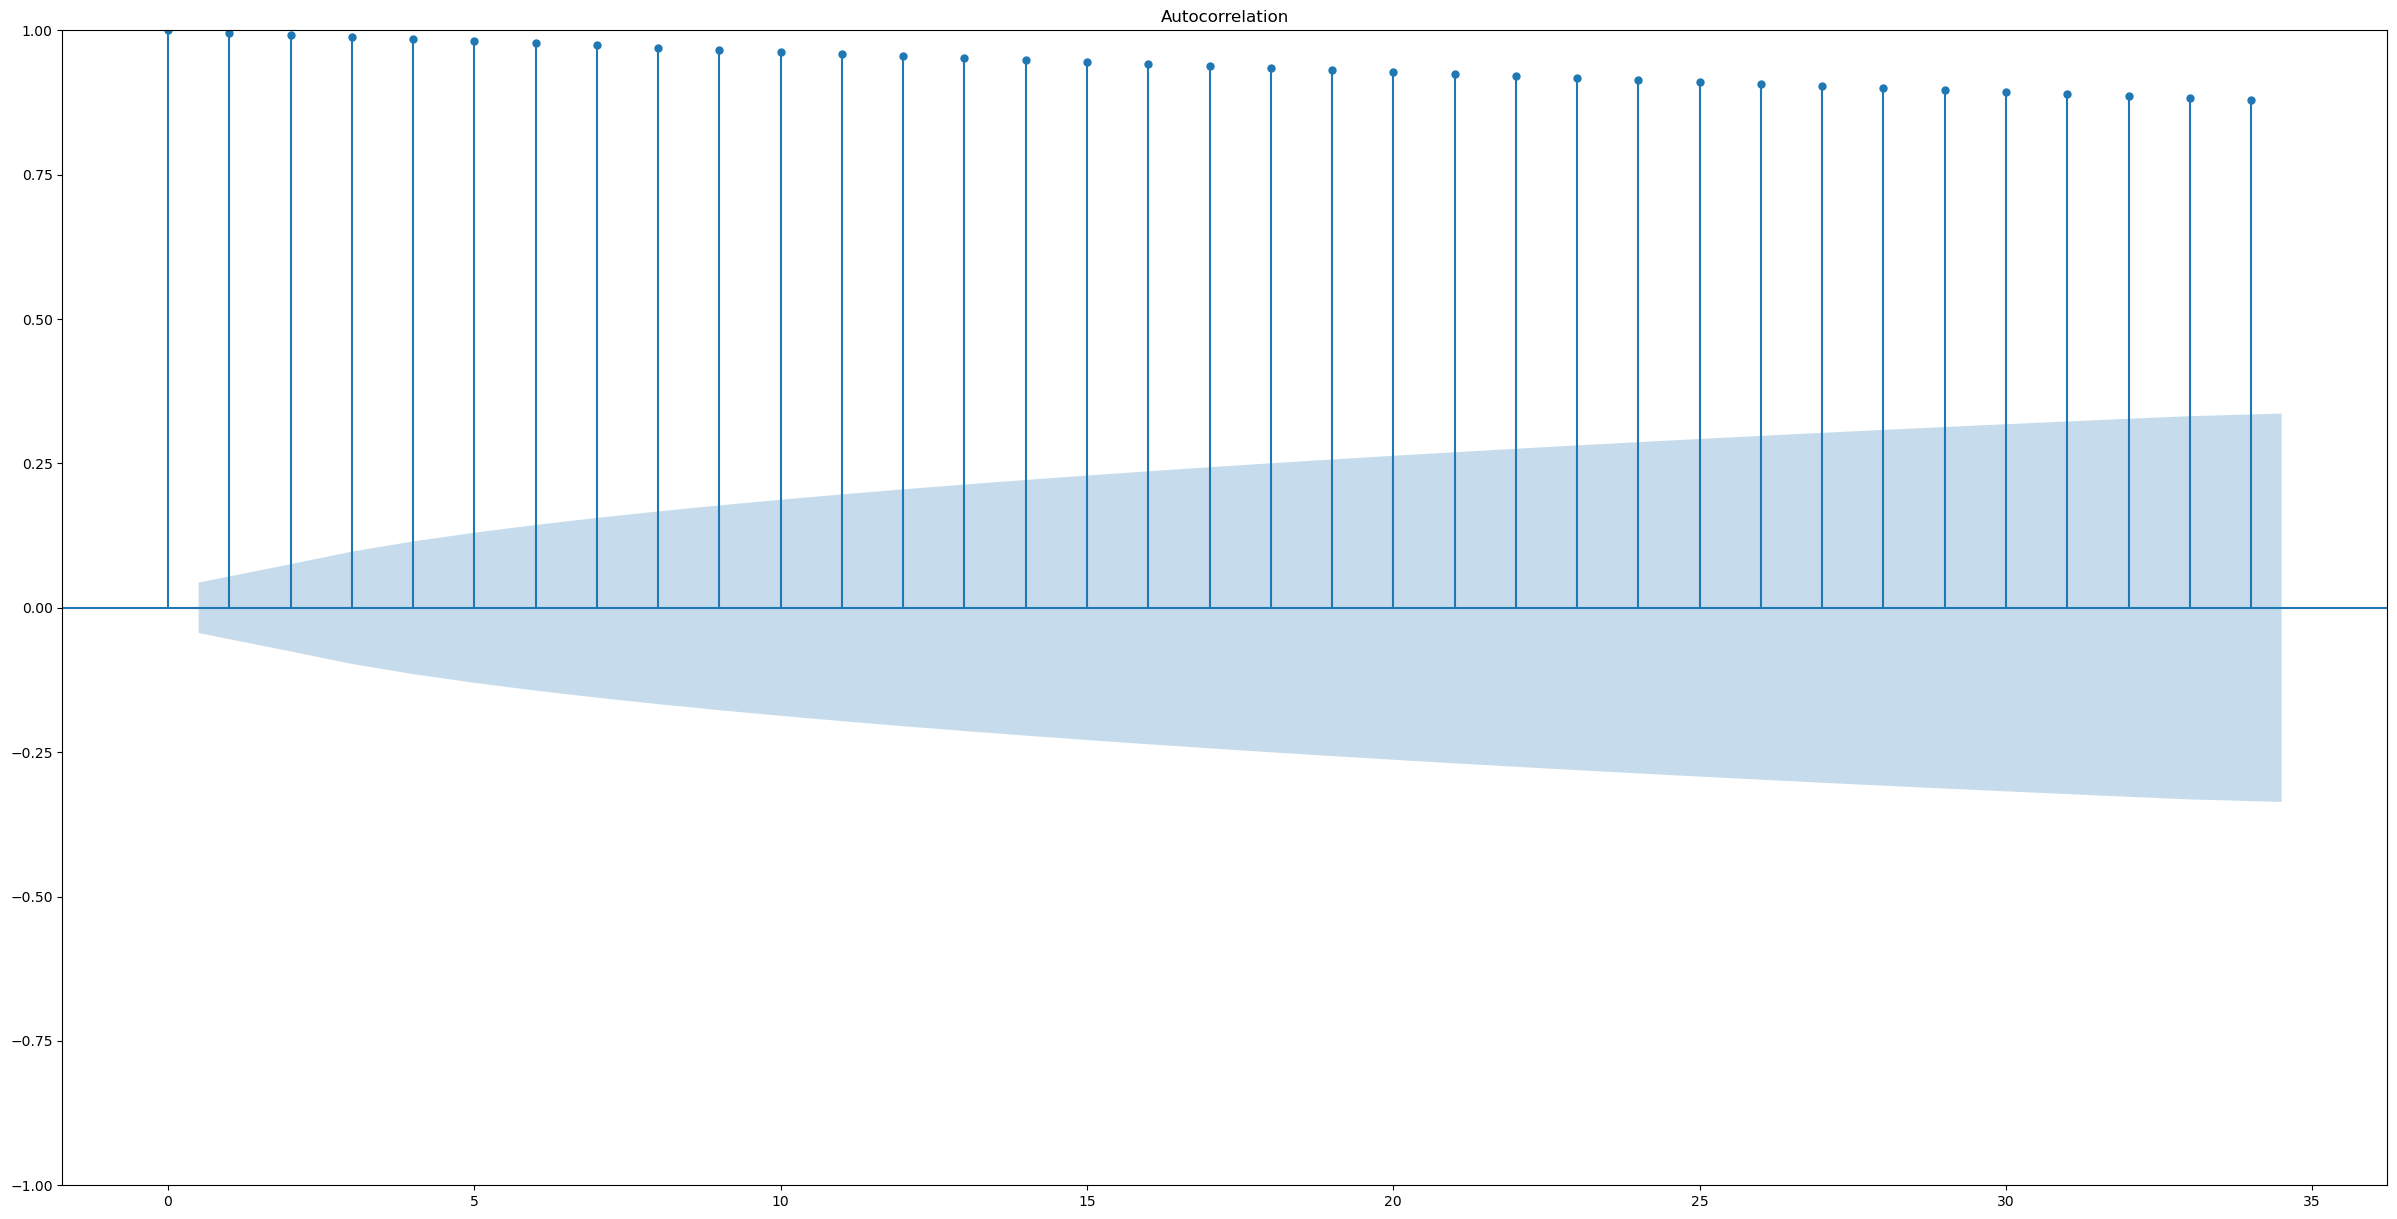

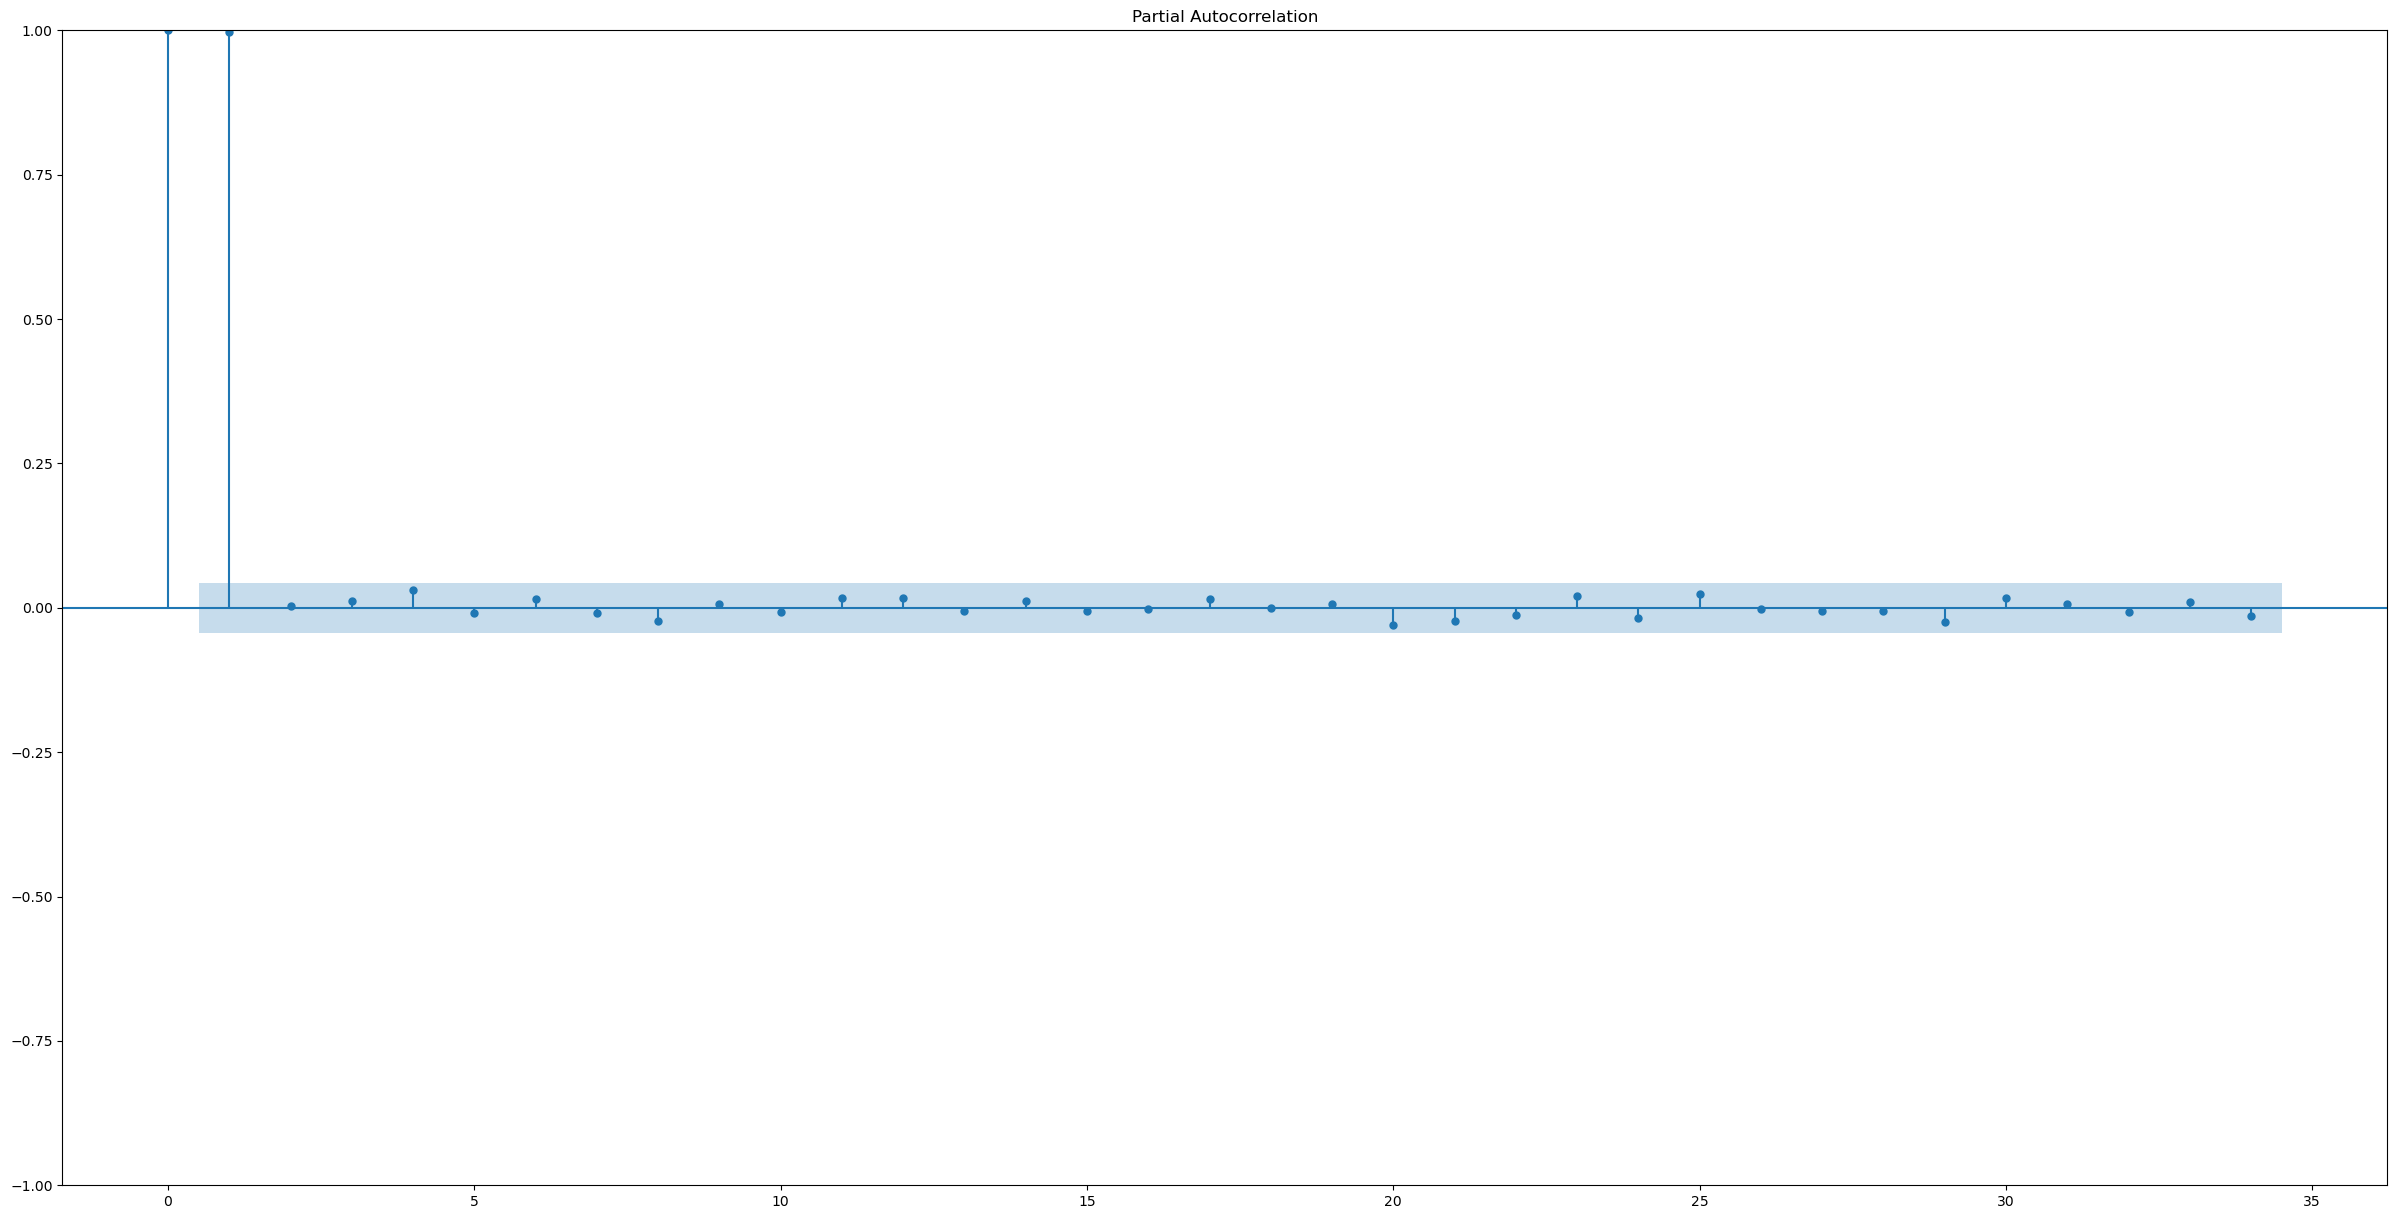

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock.Close)
plot_pacf(stock.Close)
plt.show() 

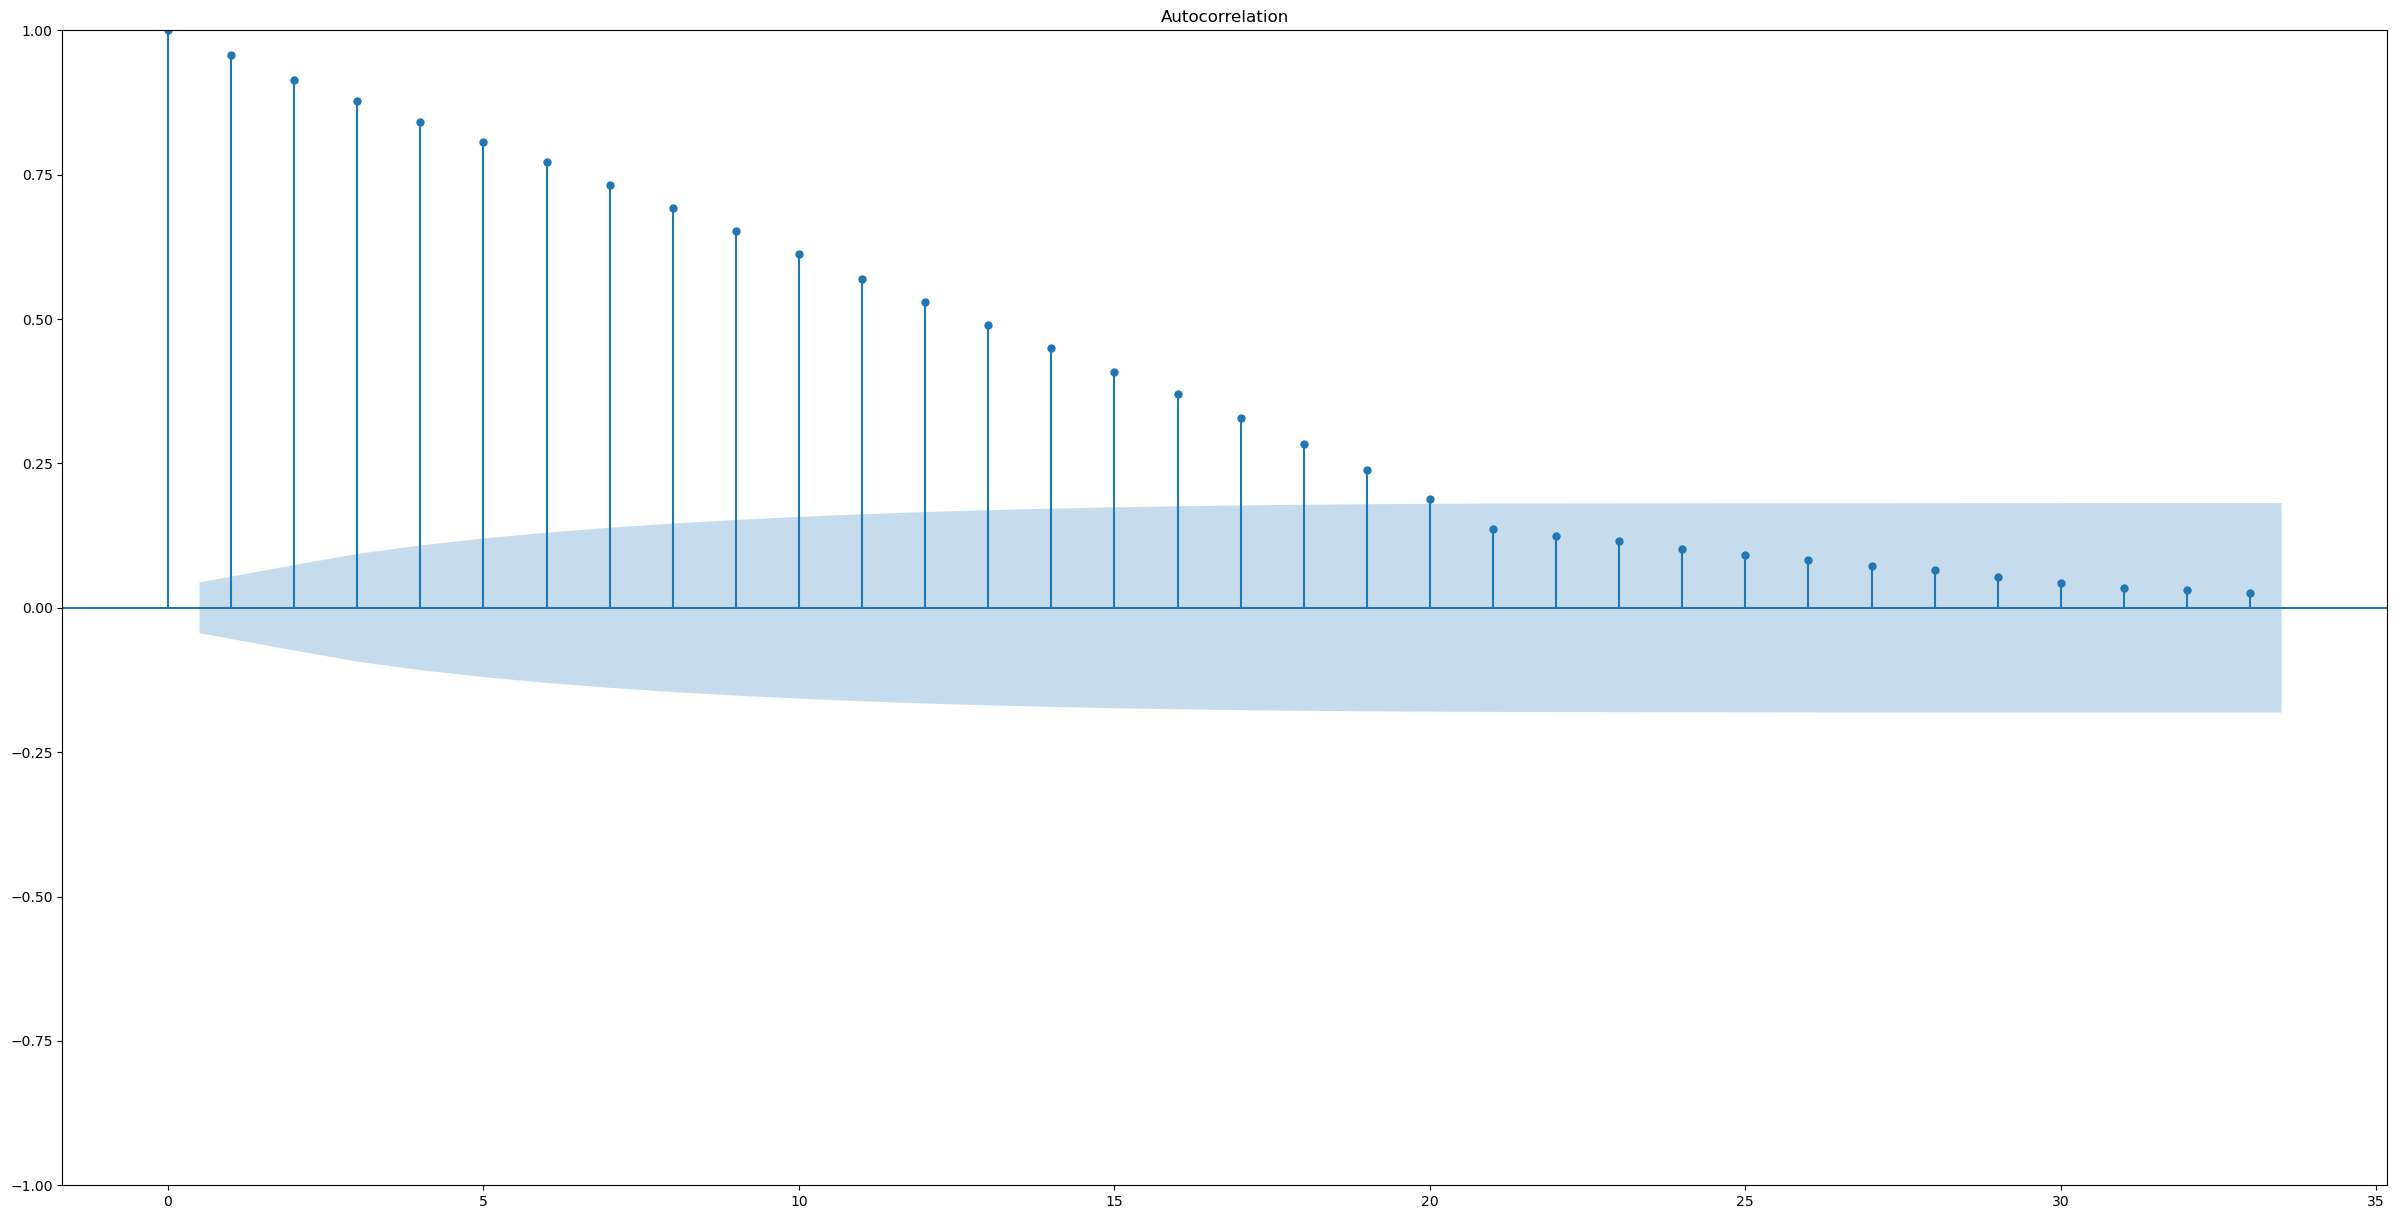

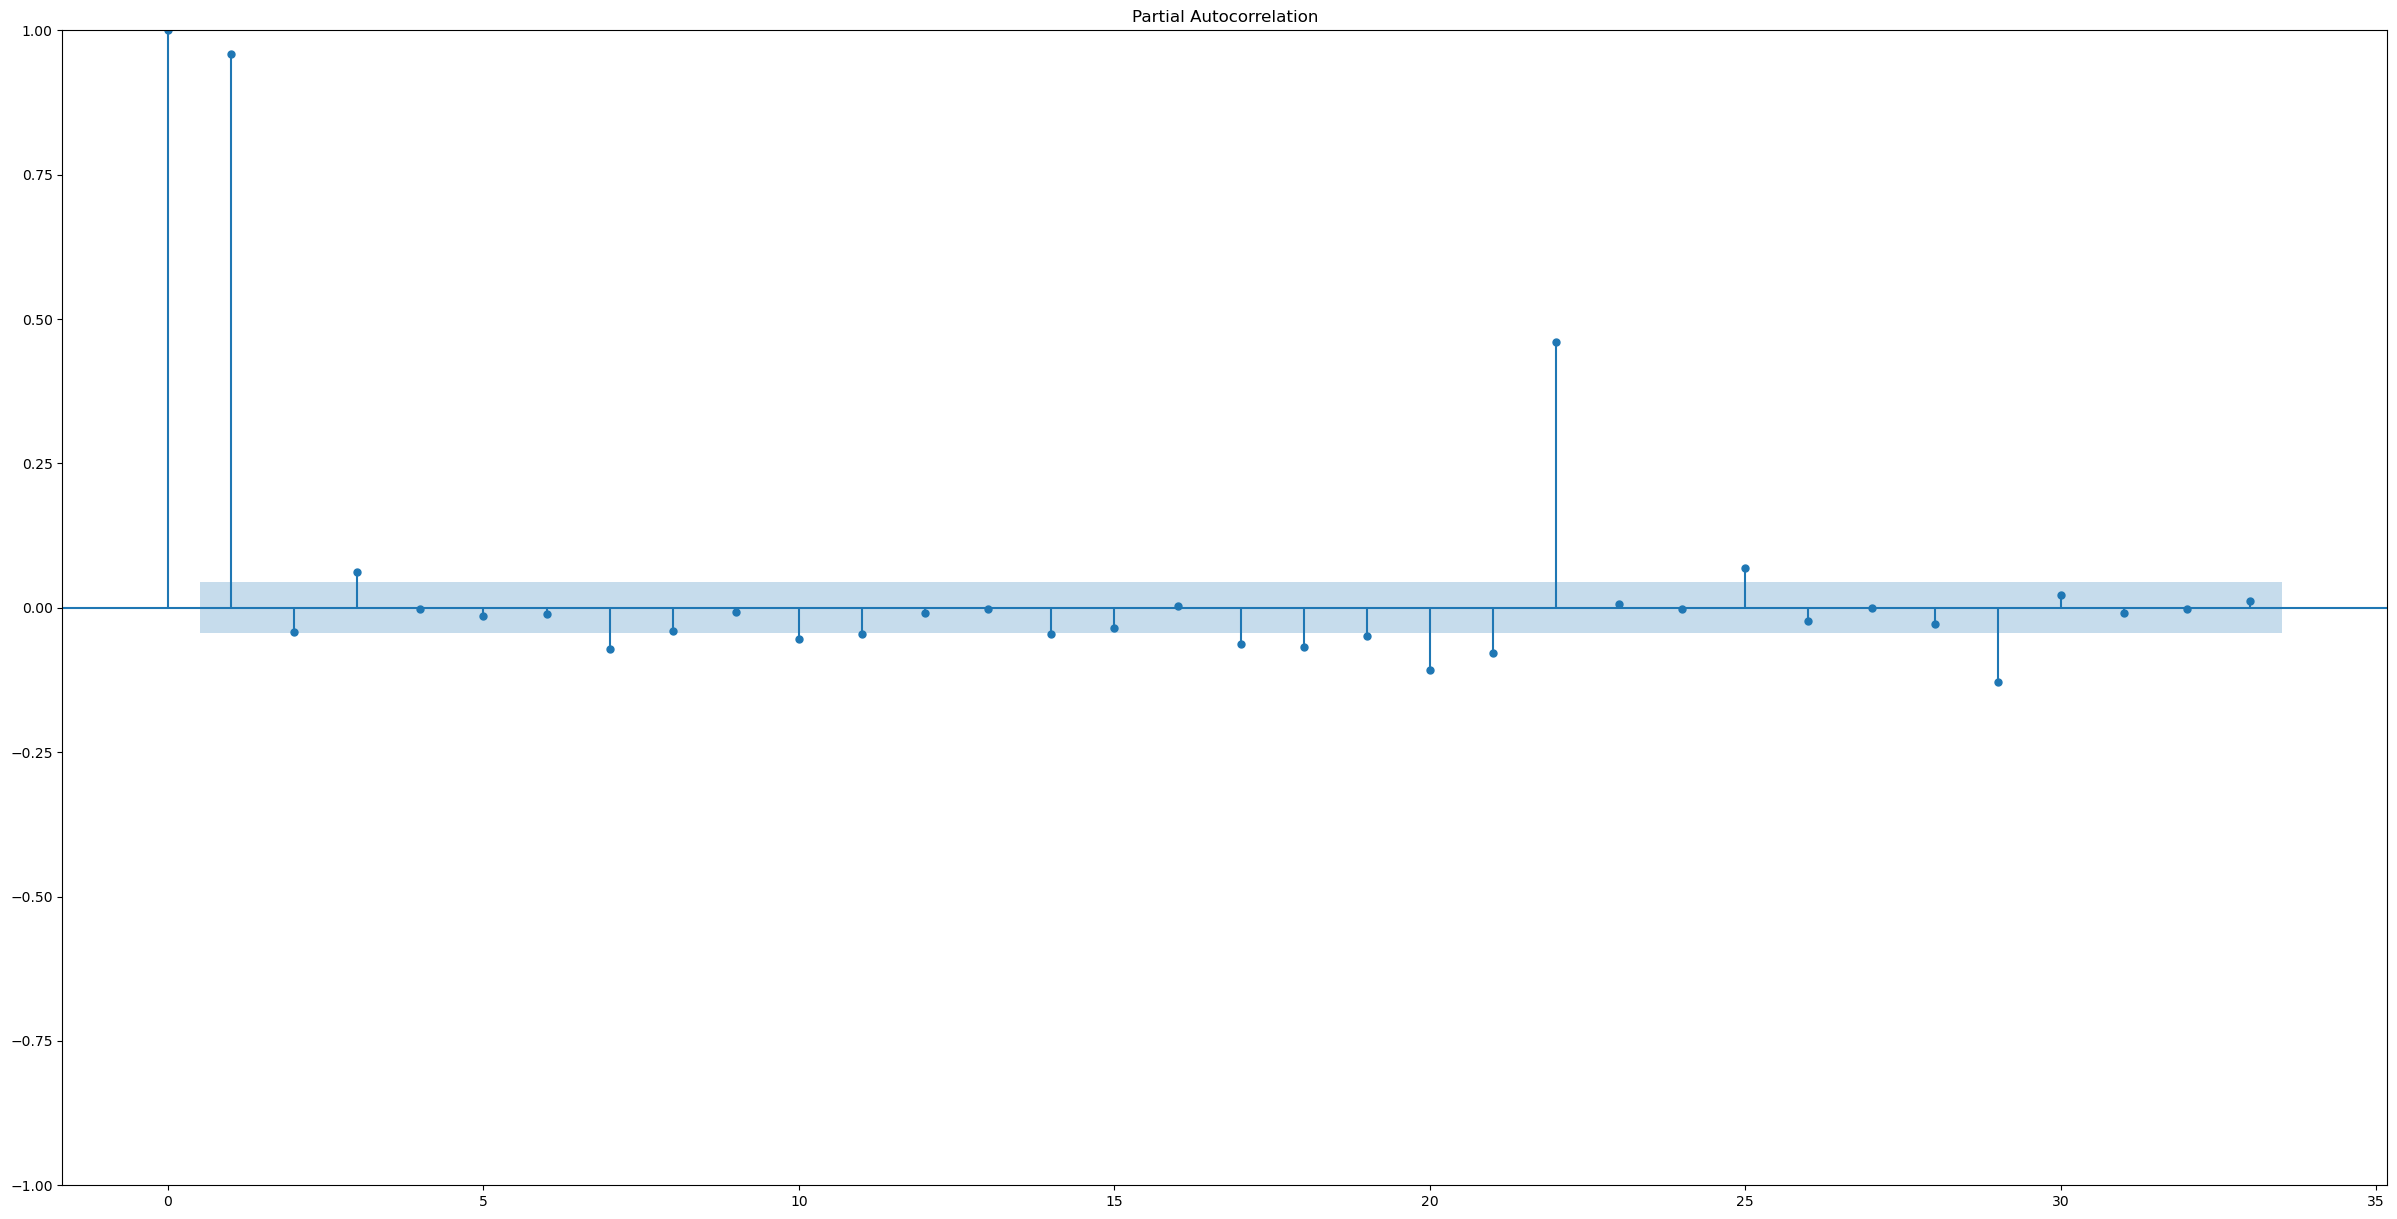

In [42]:
plot_acf(stock.Close.diff(21).dropna())
plot_pacf(stock.Close.diff(21).dropna())
plt.show() 

In [41]:
adfuller(stock.Close.diff(1).dropna())

(-13.625534323873248,
 1.763123198721029e-25,
 8,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8629.540212595413)

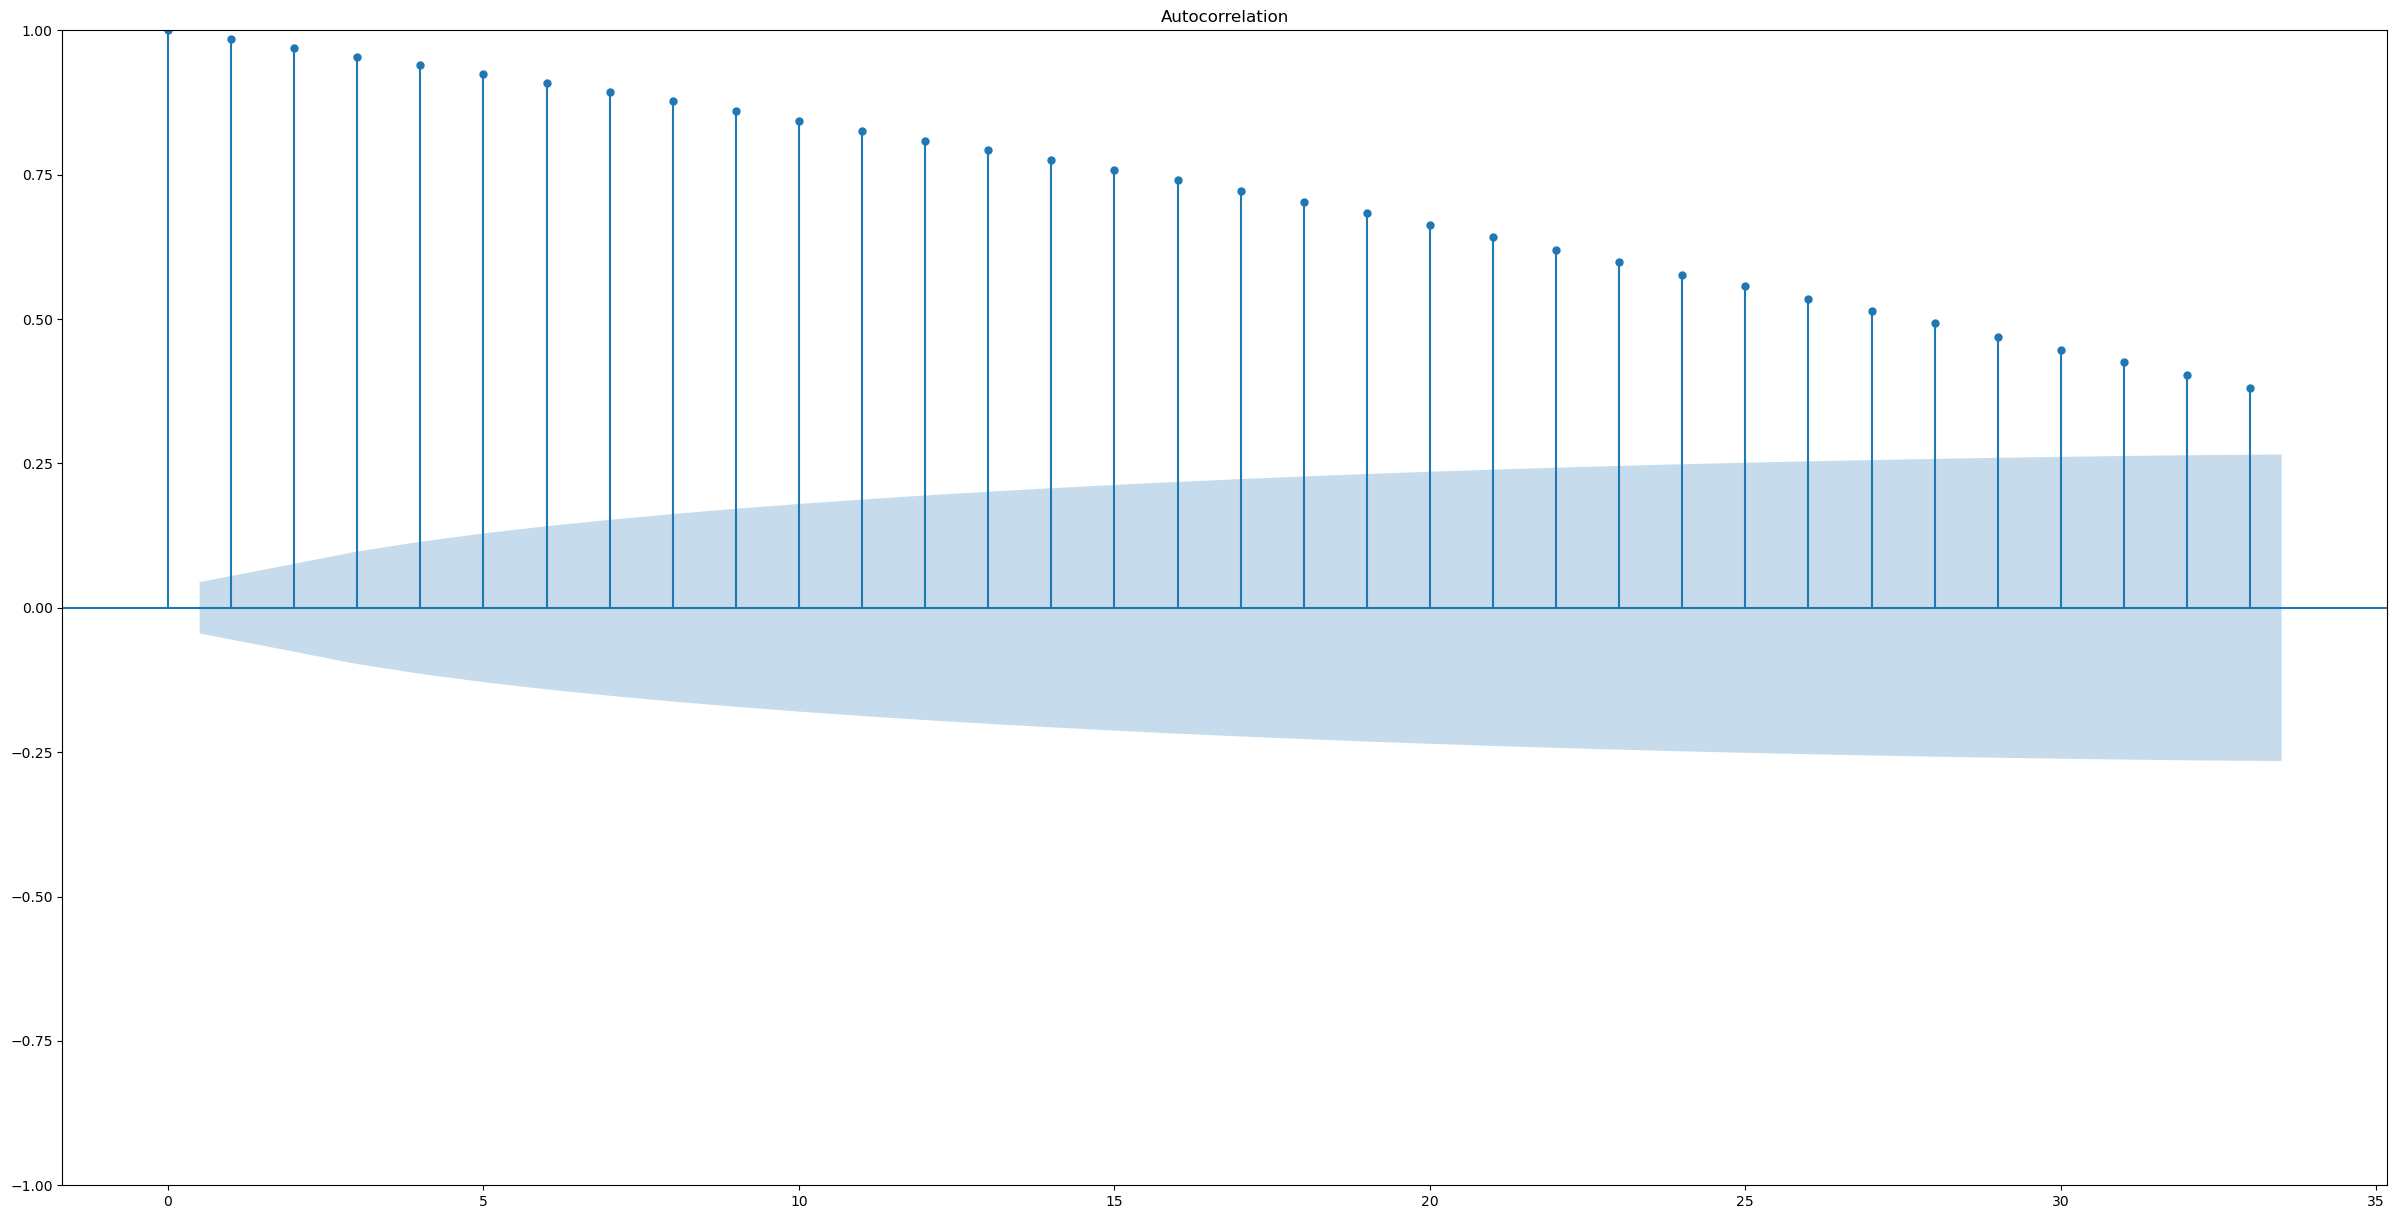

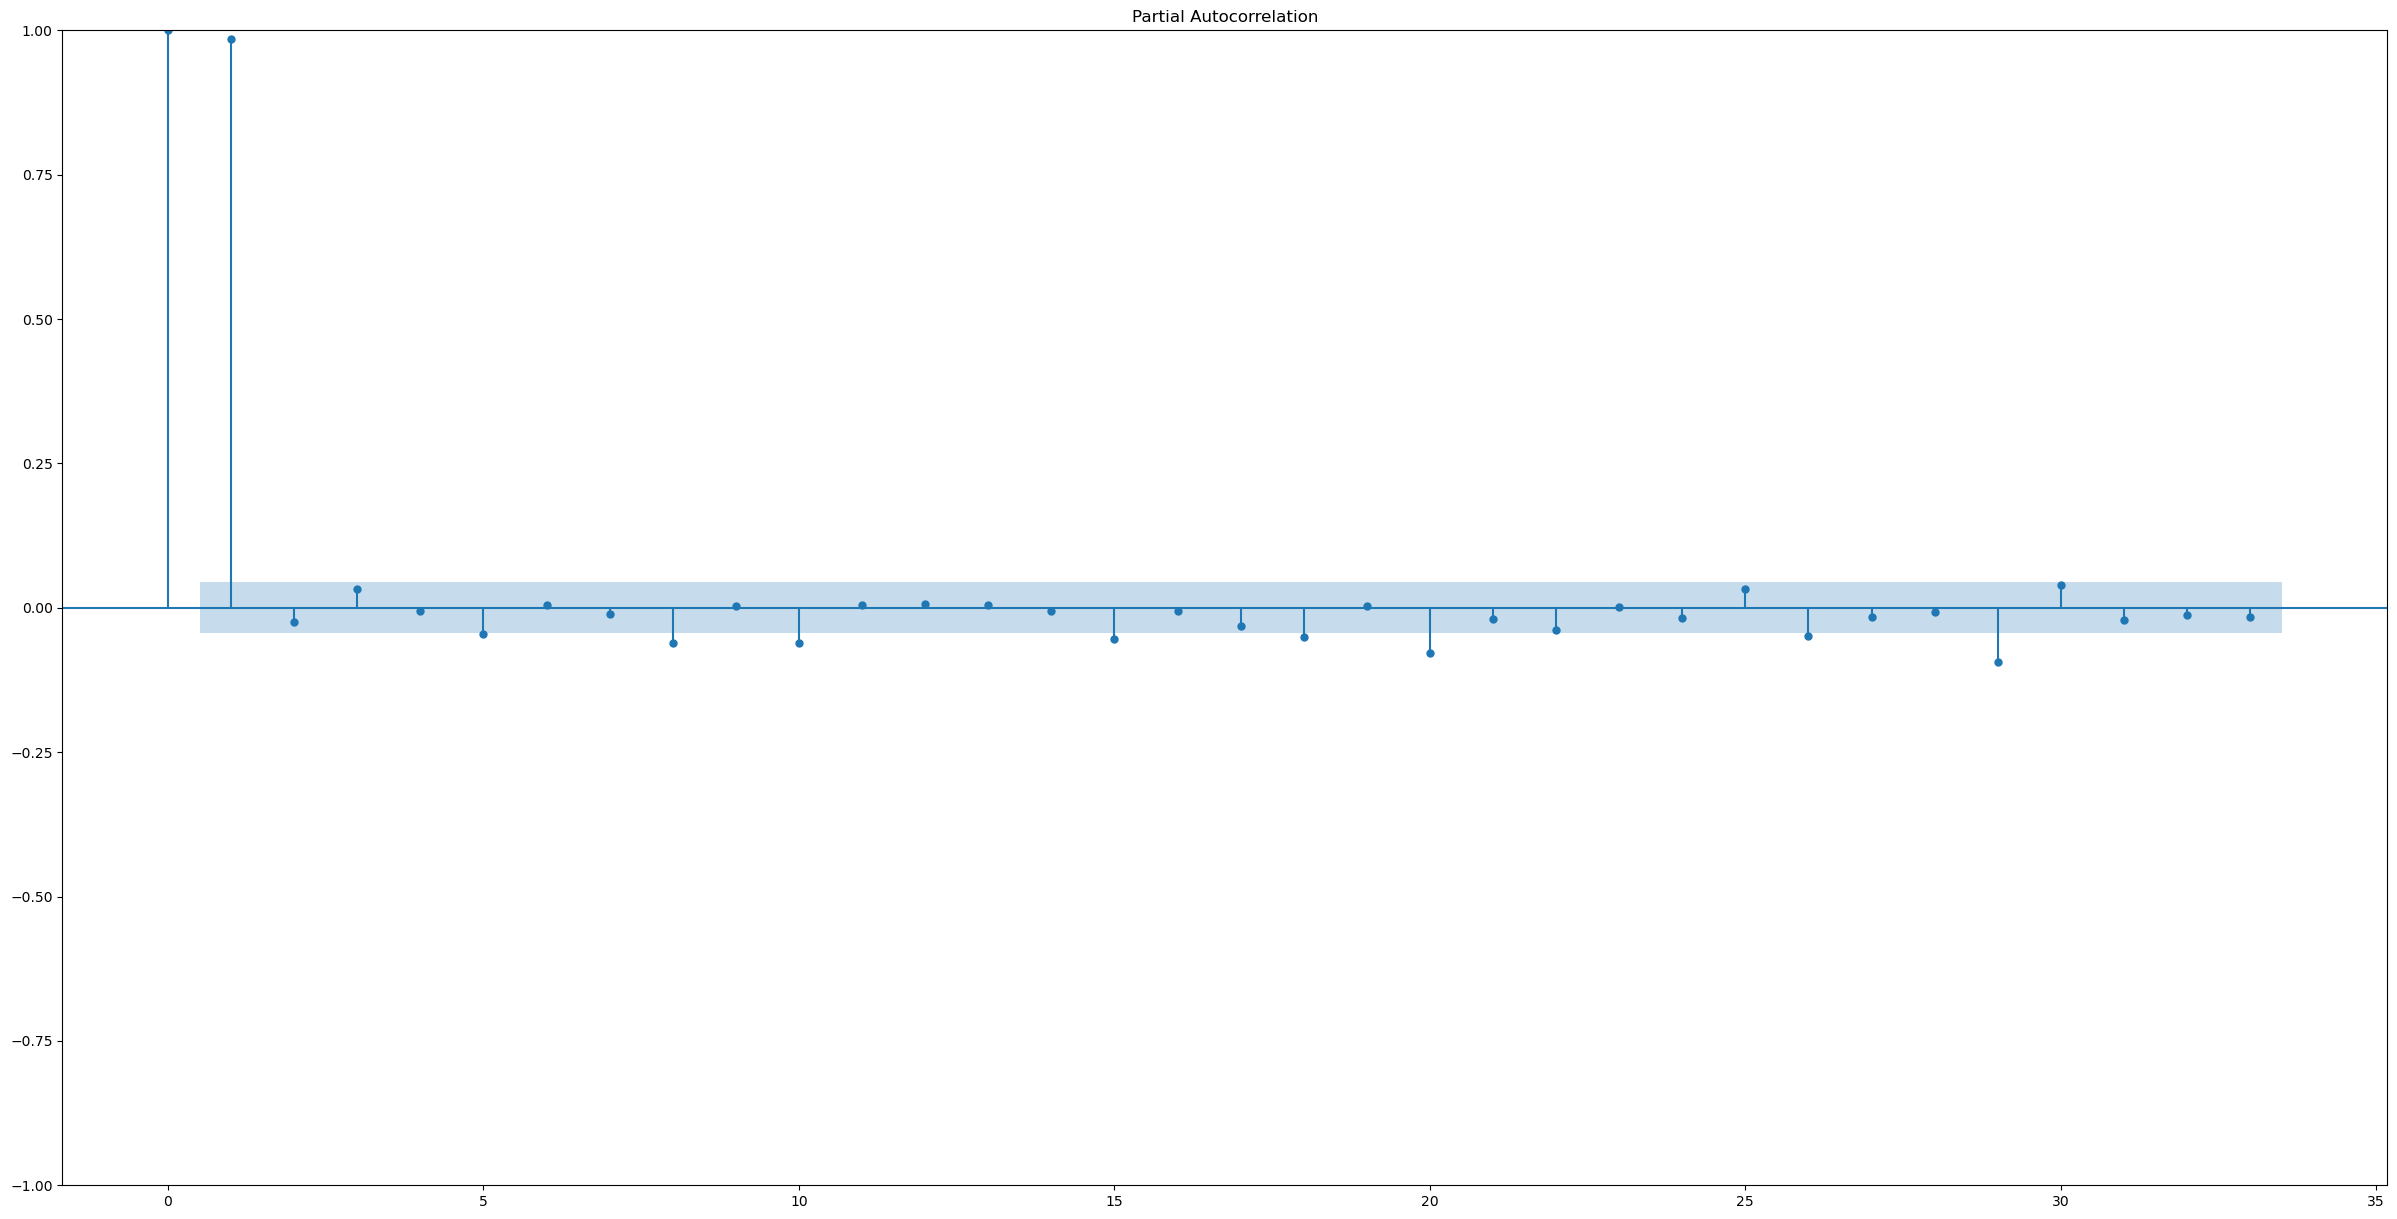

In [43]:
plot_acf(stock.Close.diff(63).dropna())
plot_pacf(stock.Close.diff(63).dropna())
plt.show() 

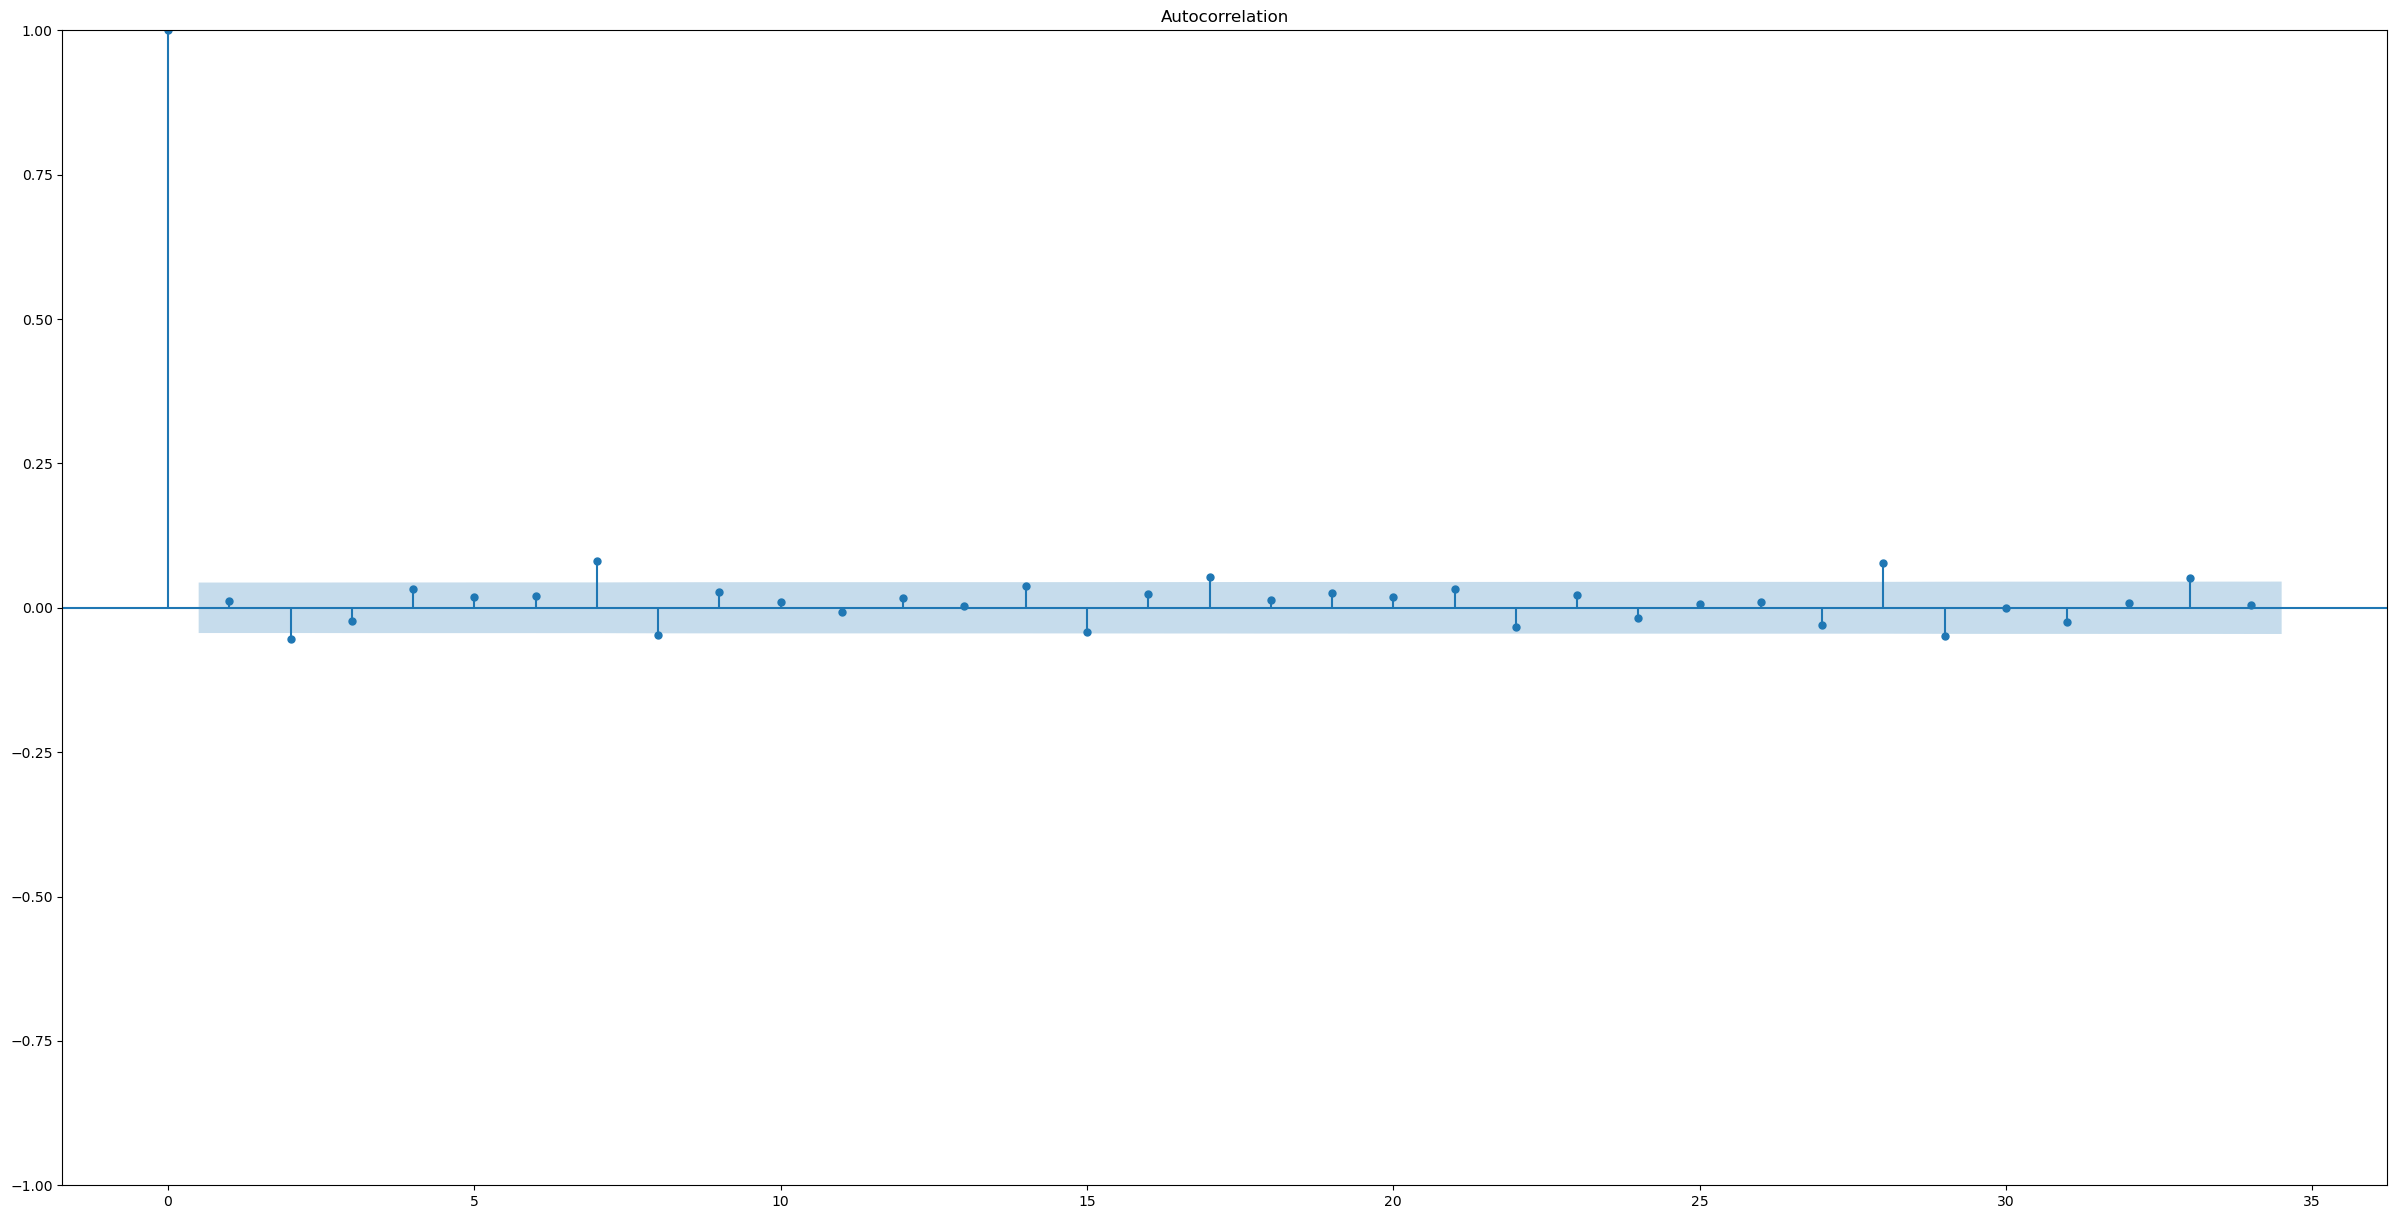

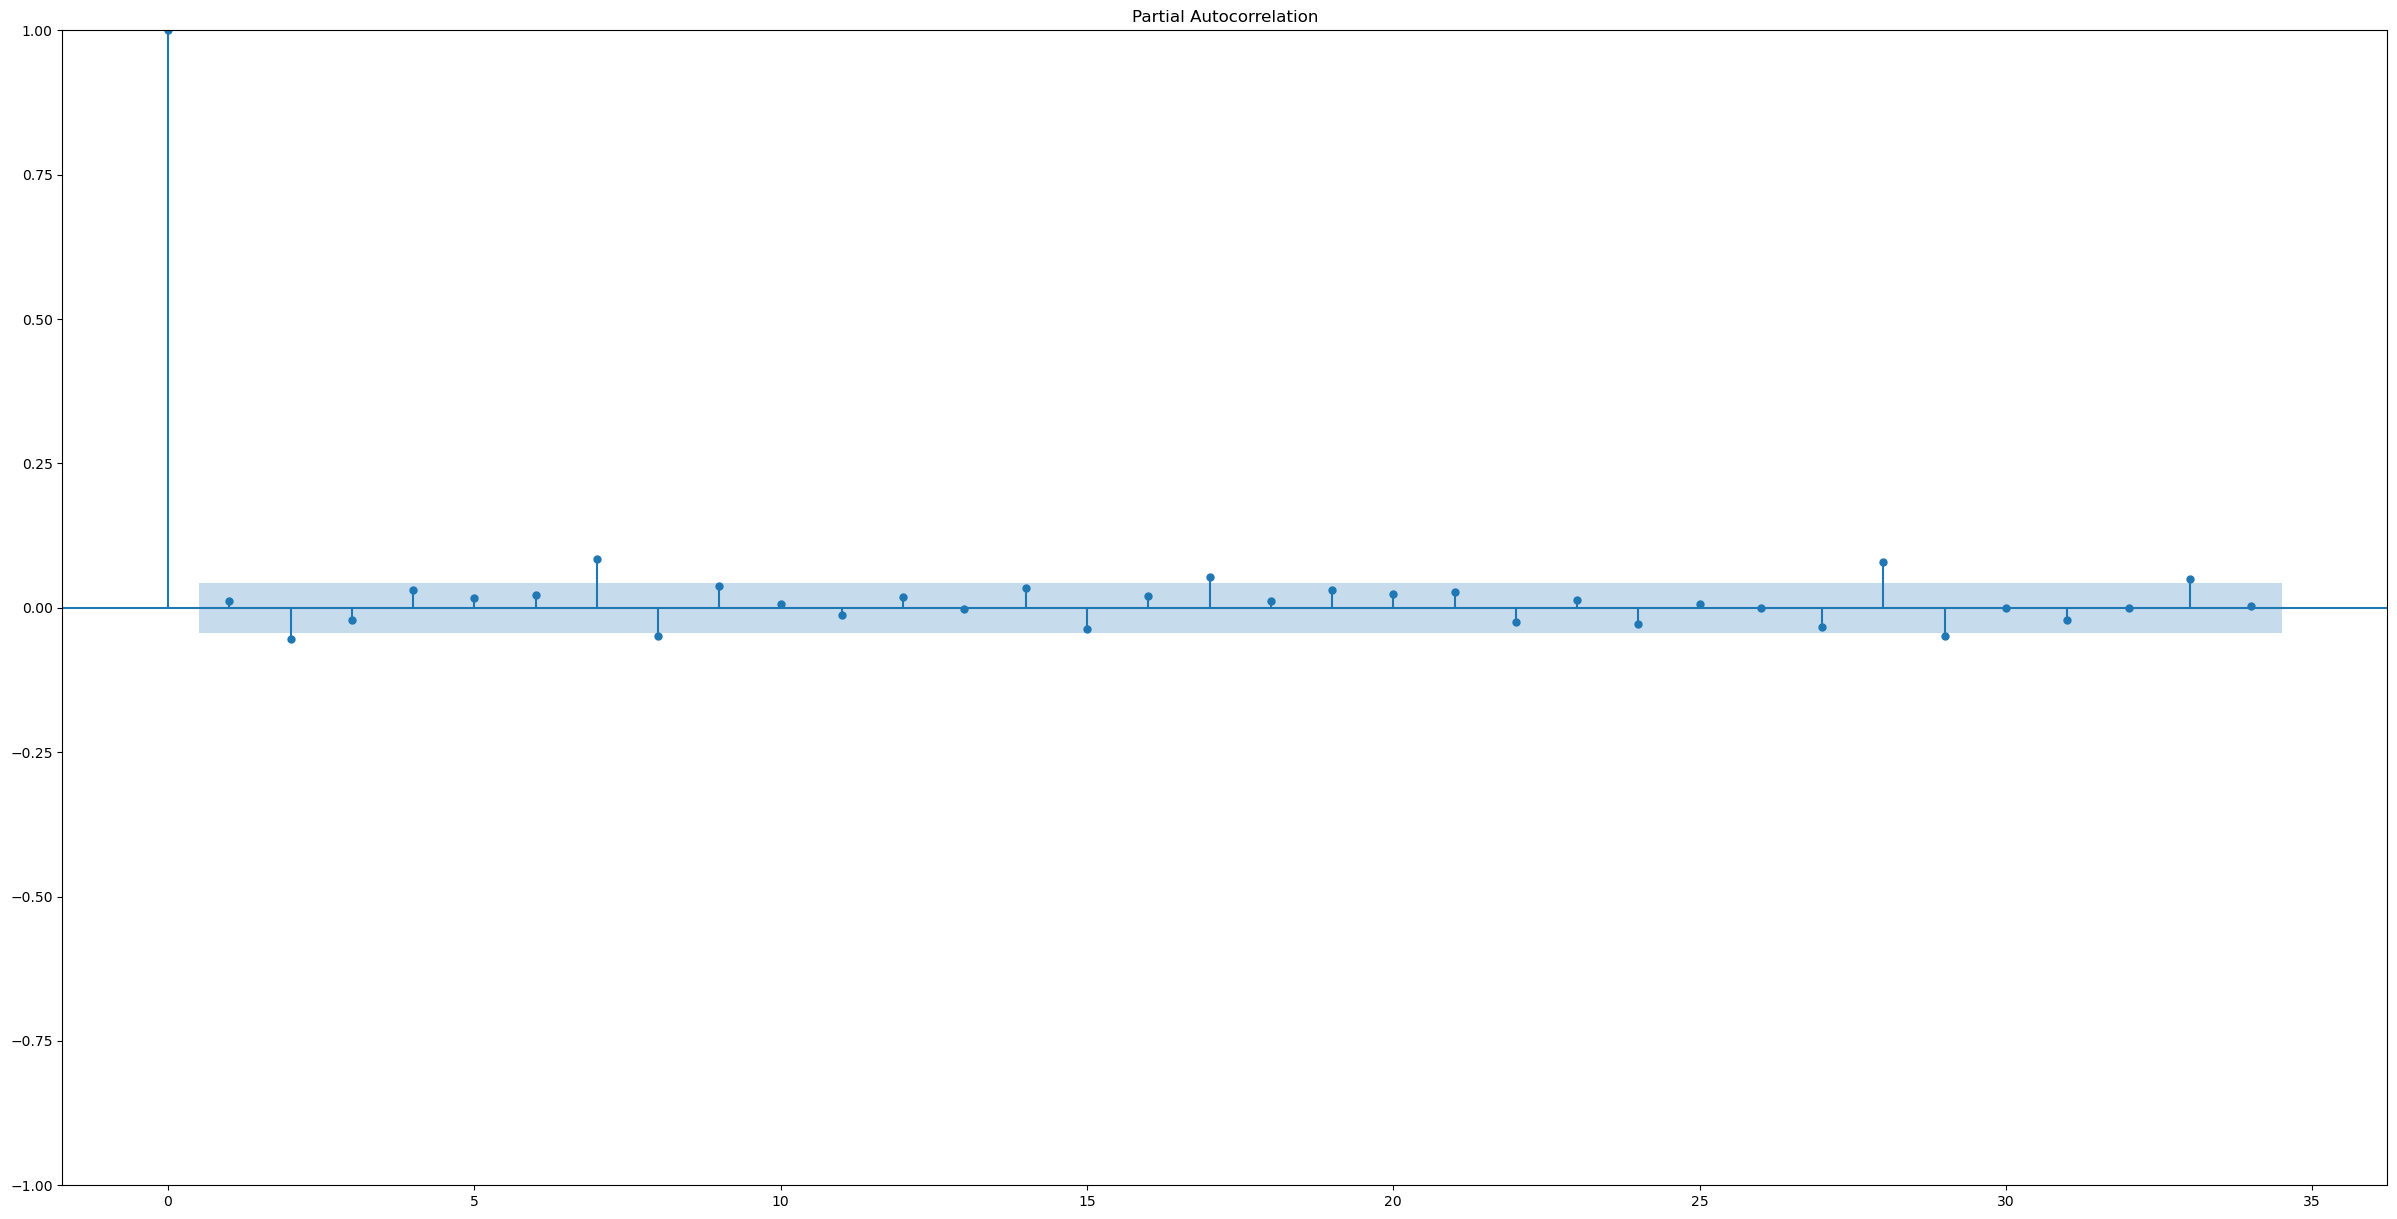

In [48]:
plot_acf(stock.Close.diff(1).dropna())
plot_pacf(stock.Close.diff(1).dropna())
plt.show() 

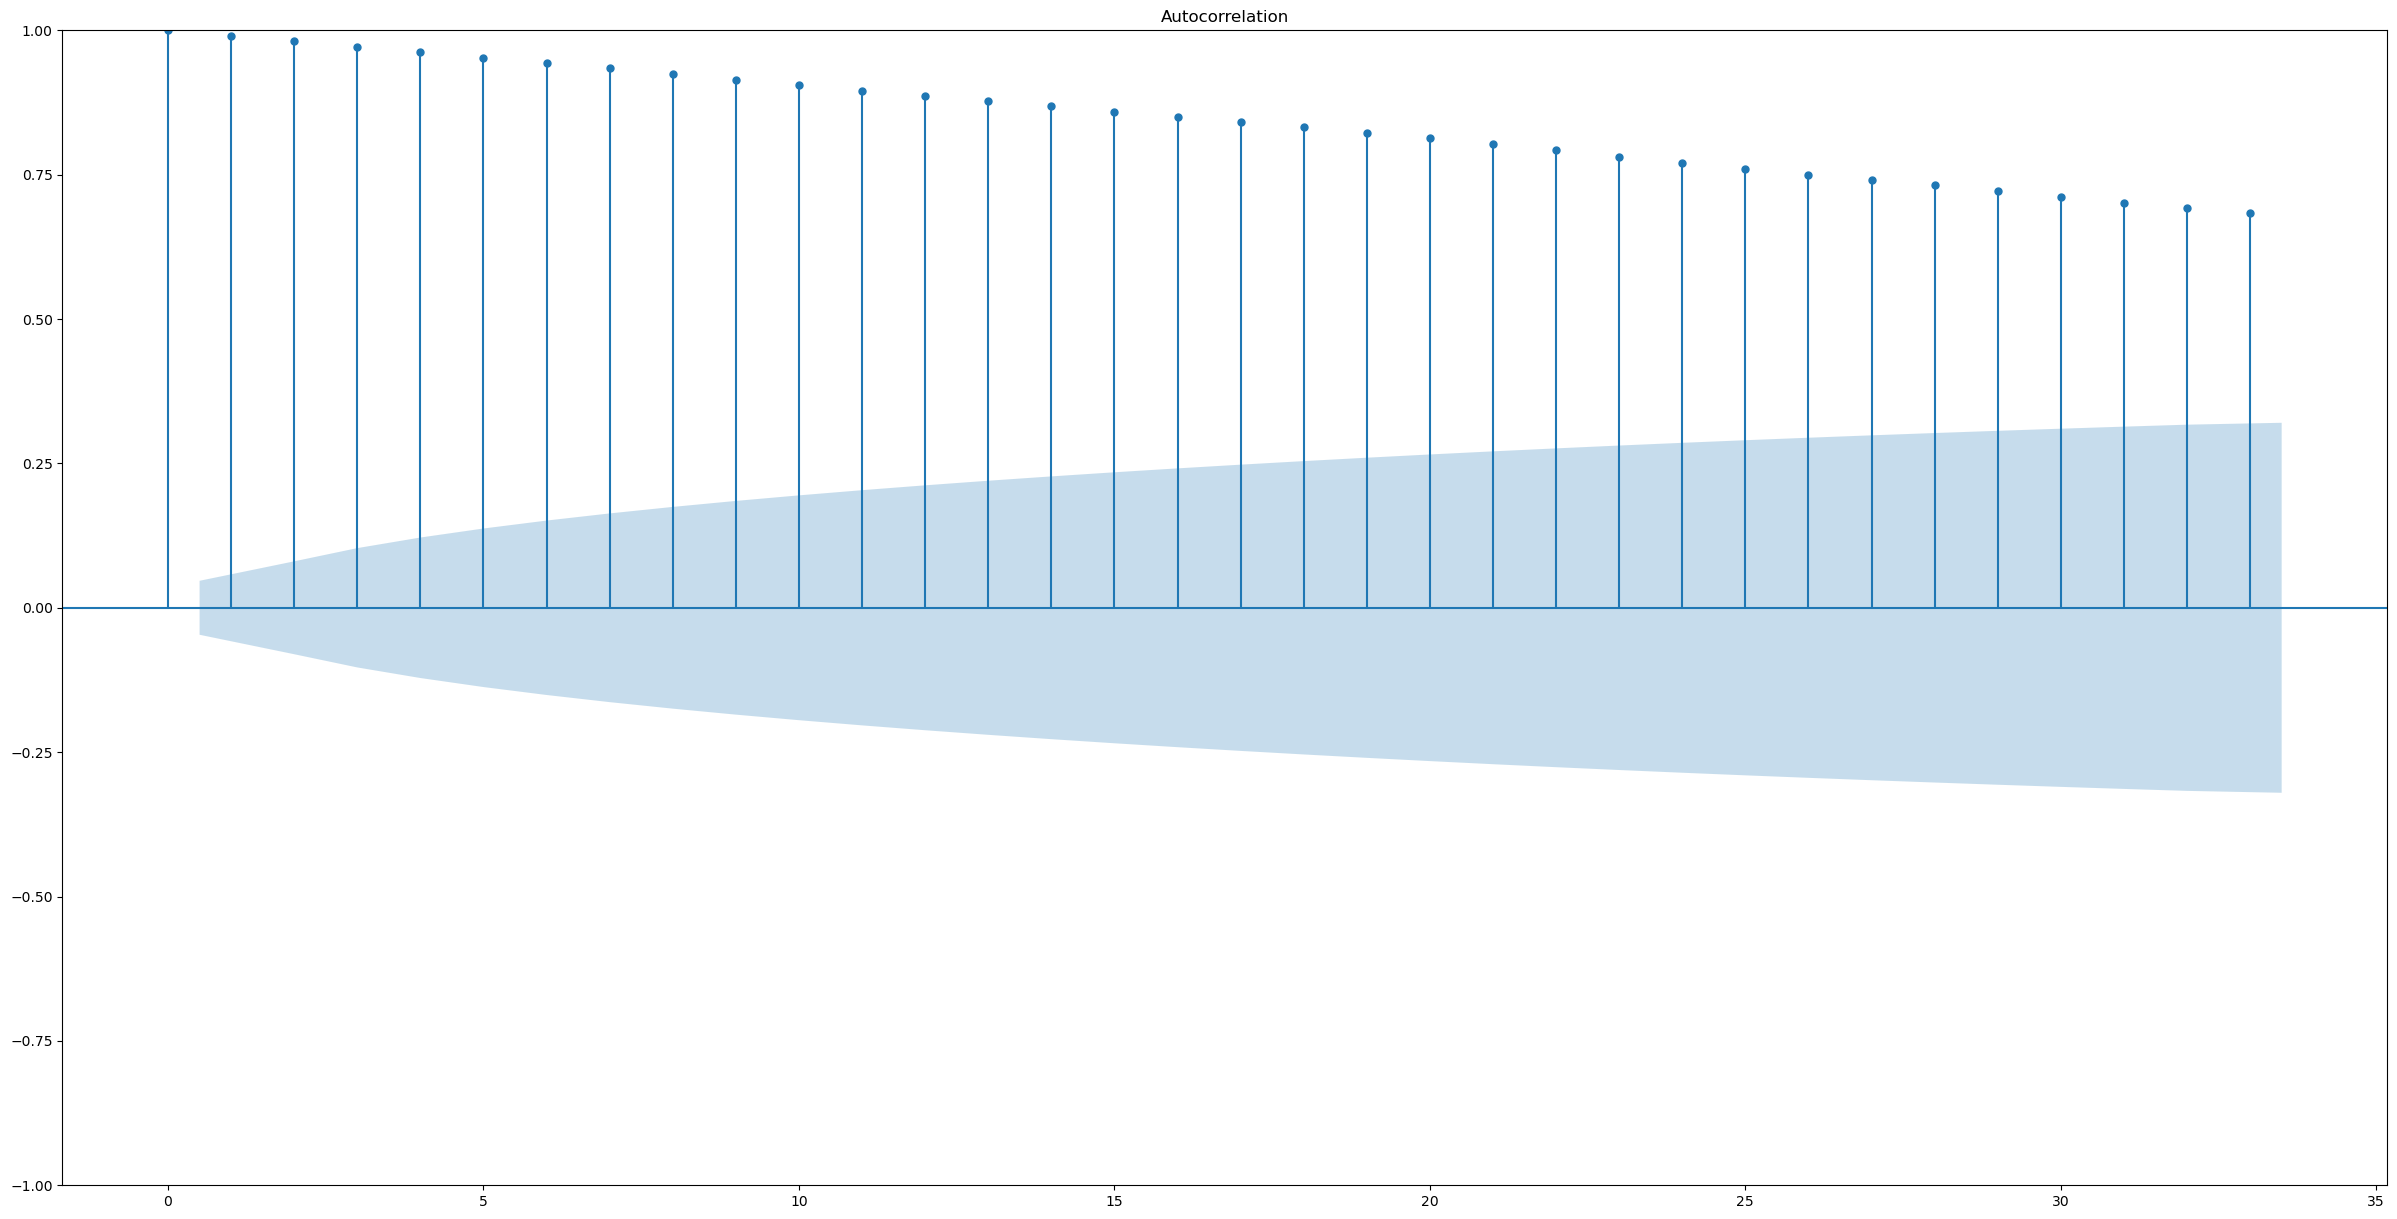

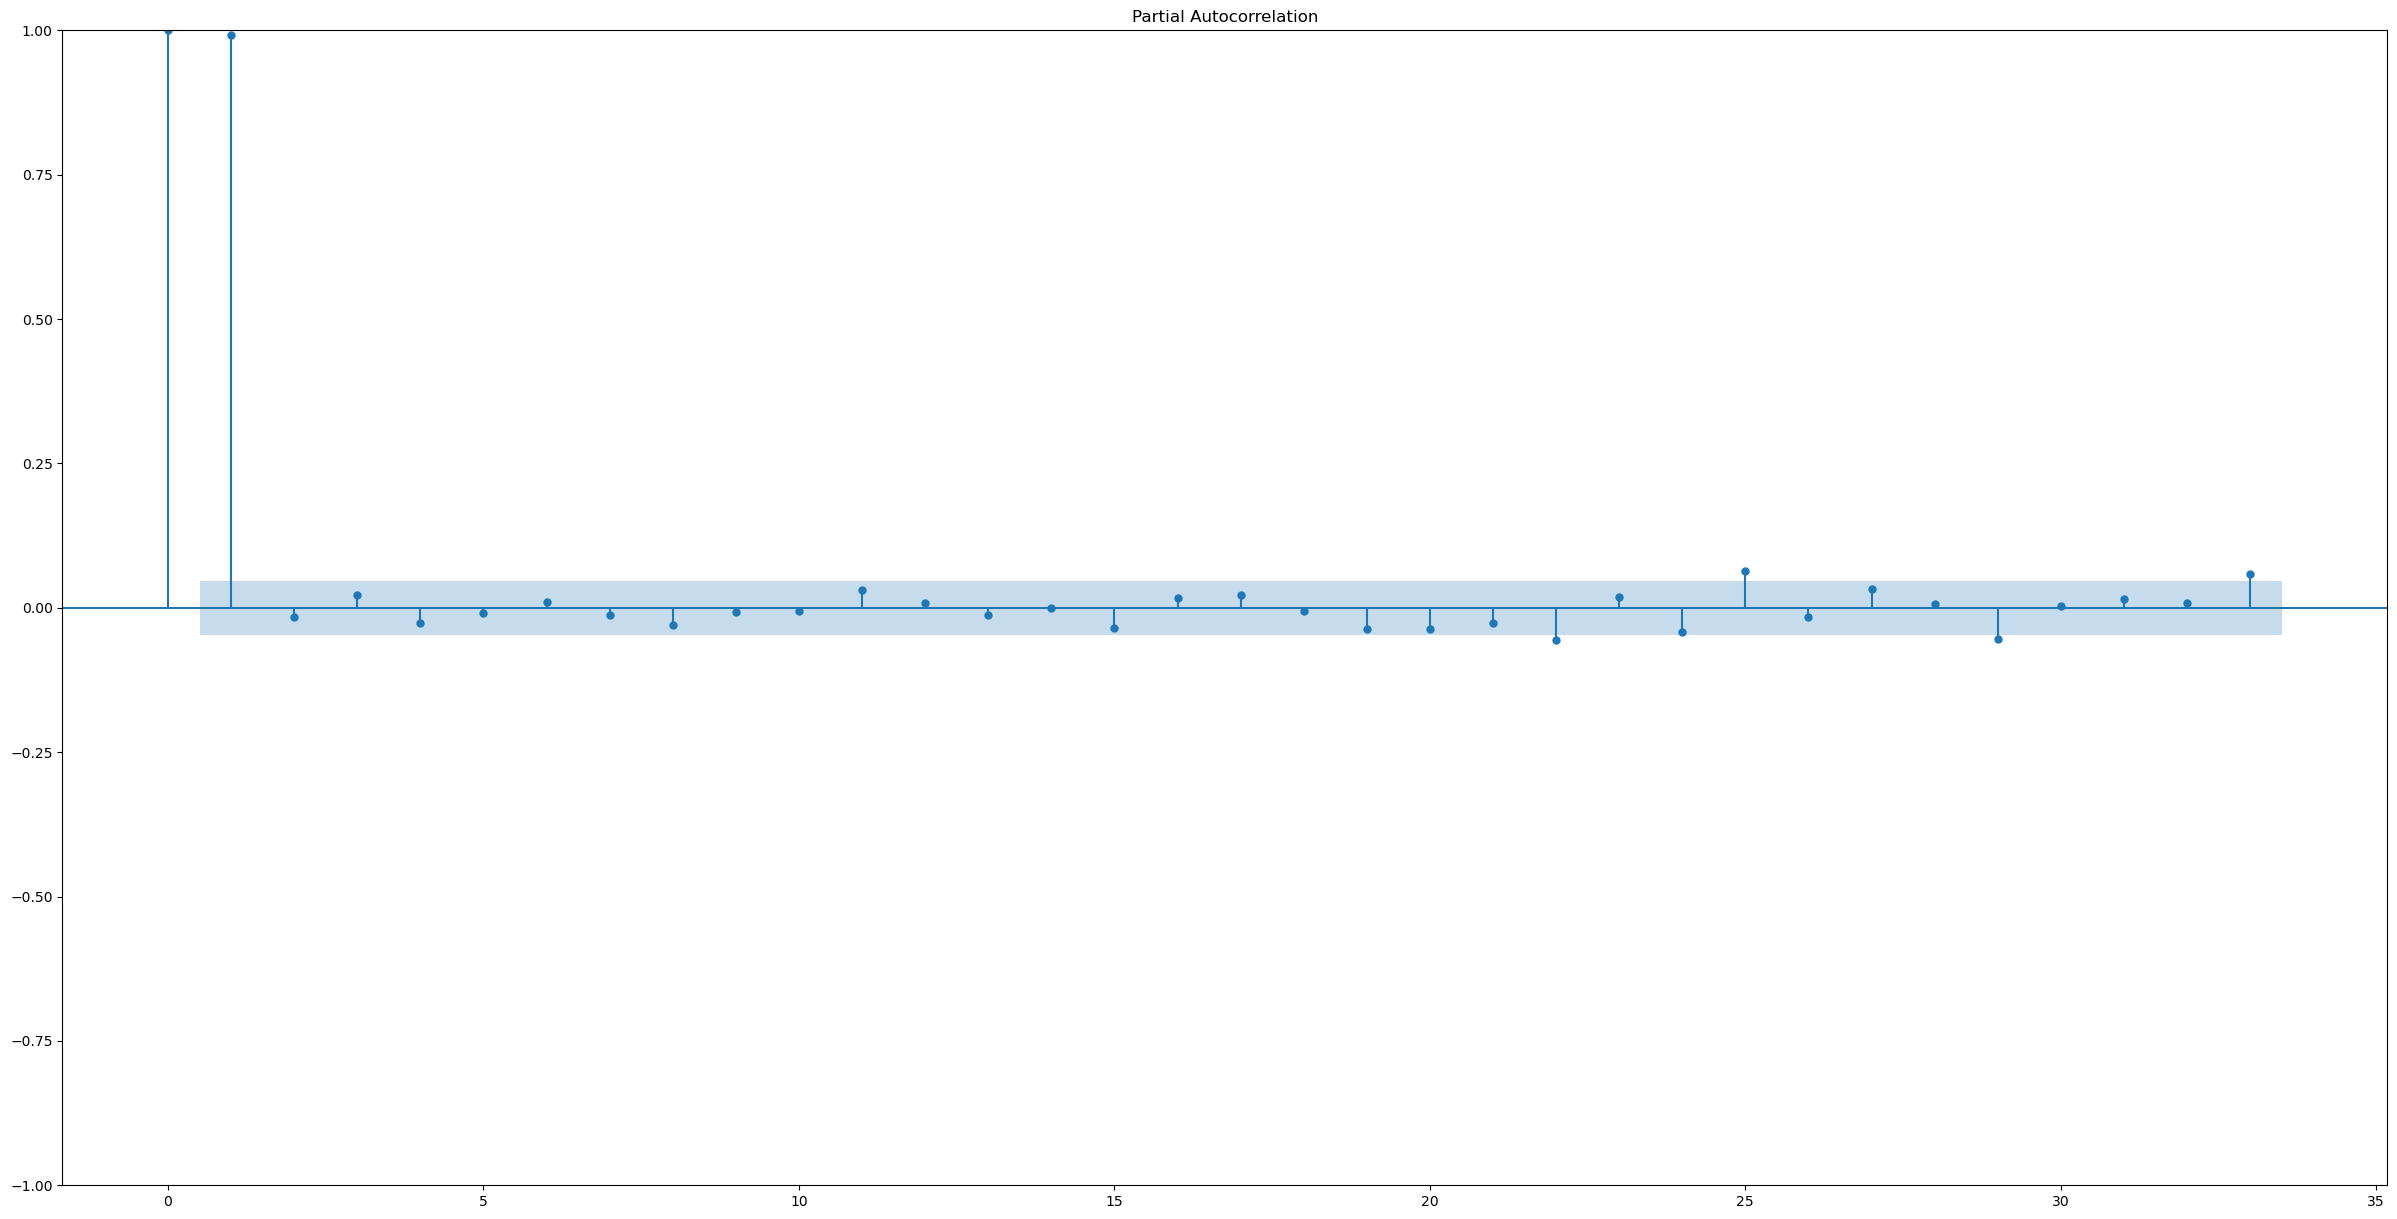

In [52]:
plot_acf(stock.Close.diff(252).dropna())
plot_pacf(stock.Close.diff(252).dropna())
plt.show() 

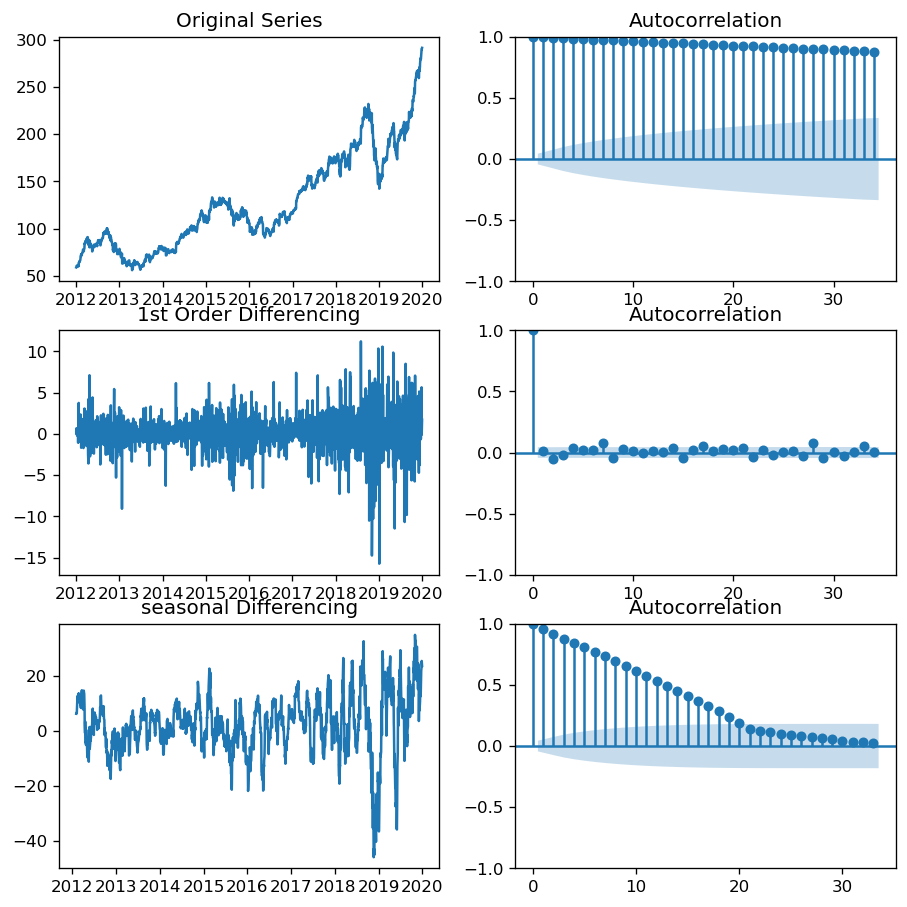

In [62]:
plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(stock.Close); axes[0, 0].set_title('Original Series')
plot_acf(stock.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(stock.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(stock.Close.diff().dropna(), ax=axes[1, 1])

# seasonal Differencing
axes[2, 0].plot(stock.Close.diff(21)); axes[2, 0].set_title('seasonal Differencing')
plot_acf(stock.Close.diff(21).dropna(), ax=axes[2, 1])

plt.show()

# Train and Test Data separation

In [63]:
stock

,Open,High,Low,Close,Adj Close,Volume,Date,month,year,Day,week,quarter,quarter_y
Date,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03,01,2012,03,01,1,2012Q1
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04,01,2012,04,01,1,2012Q1
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05,01,2012,05,01,1,2012Q1
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06,01,2012,06,01,1,2012Q1
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09,01,2012,09,02,1,2012Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,2019-12-23,12,2019,23,52,4,2019Q4
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,2019-12-24,12,2019,24,52,4,2019Q4
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019-12-26,12,2019,26,52,4,2019Q4


In [66]:
train=stock.iloc[:1400,:]
test=stock.iloc[1400:,:]

In [67]:
train

,Open,High,Low,Close,Adj Close,Volume,Date,month,year,Day,week,quarter,quarter_y
Date,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03,01,2012,03,01,1,2012Q1
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04,01,2012,04,01,1,2012Q1
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05,01,2012,05,01,1,2012Q1
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06,01,2012,06,01,1,2012Q1
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09,01,2012,09,02,1,2012Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-20,151.500000,151.740005,150.190002,150.339996,143.839996,17243700,2017-07-20,07,2017,20,29,3,2017Q3
2017-07-21,149.990005,150.440002,148.880005,150.270004,143.773026,26252600,2017-07-21,07,2017,21,29,3,2017Q3
2017-07-24,150.580002,152.440002,149.899994,152.089996,145.514374,21493200,2017-07-24,07,2017,24,30,3,2017Q3


In [68]:
test

,Open,High,Low,Close,Adj Close,Volume,Date,month,year,Day,week,quarter,quarter_y
Date,,,,,,,,,,,,,
2017-07-27,153.750000,153.990005,147.300003,150.559998,144.050507,32476300,2017-07-27,07,2017,27,30,3,2017Q3
2017-07-28,149.889999,150.229996,149.190002,149.500000,143.036331,17213700,2017-07-28,07,2017,28,30,3,2017Q3
2017-07-31,149.899994,150.330002,148.130005,148.729996,142.299622,19845900,2017-07-31,07,2017,31,31,3,2017Q3
2017-08-01,149.100006,150.220001,148.410004,150.050003,143.562546,35368600,2017-08-01,08,2017,01,31,3,2017Q3
2017-08-02,159.279999,159.750000,156.160004,157.139999,150.346008,69936800,2017-08-02,08,2017,02,31,3,2017Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,2019-12-23,12,2019,23,52,4,2019Q4
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,2019-12-24,12,2019,24,52,4,2019Q4
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019-12-26,12,2019,26,52,4,2019Q4


#  Models

In [ ]:
apple_data_driven_models

In [ ]:
apple_stock_arima

In [ ]:
apple_data_driven_models